<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Communication Systems
</font>
<hr/>
<font color="#800080" size=5>
Assignment 1
<br>
</font>
<font size=5>
Instructor: Dr. Pakravan
<br>
</font>
<font size=4>
Fall 2024
<br>
</font>
<font face="Times New Roman" size=4>
Deadline: ...
</font>
<hr>
<br>
</font>
<font face="Times New Roman" size=4 align=center>
Feel free to ask your questions in Telegram : @Ali99os
</font>
<br>
<hr>
</div></font>

In [1]:
Name = "Iman Alizadeh Fakouri"
StudentId = "401102134"

# Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
from scipy.signal import butter, filtfilt
import scipy.signal as signal
import soundfile as sf
from sklearn.metrics import mean_squared_error

### add your libraries

# Question 1

Imagine you’re setting up a WiFi network where six users are exchanging data in a dedicated frequency band. This network operates within the 125 kHz band, chosen for its reliable signal reach and data capacity.

To keep the simulation manageable, we’ll downscale to a lower frequency range while preserving realistic signal behavior. Each user will transmit data within their own distinct frequency range, centered at intervals across the 125 kHz band, effectively representing separate communication channels. This approach keeps the simulation both realistic and computationally efficient.

Your task is to simulate and analyze how this network functions, observing how the access point coordinates the six data streams and minimizes cross-channel interference.

In [5]:
# Parameters for the simulation
fs_simulation = 500000            # 500 kHz sampling rate for simulation
duration      = 15            # Duration in seconds
center_freq   = 125000            # Center frequency for downscaled signal (125 kHz)
num_samples   =fs_simulation*duration

# Create a time vector
t = np.linspace(0, duration, num_samples)

## Audio Processing and Upsampling

In this part, you will process and prepare arbitrary audio files for a communication signal simulation. The goal is to transform the audio into a form suitable for further signal processing, such as modulation and transmission in a simulated communication system. The following steps outline what you need to do:

#### Reading and Processing the Audio Files
- **Locate Audio Files:** Make sure your audio files are placed in the same folder as this Jupyter Notebook or specify the path to the folder containing the audio files.
- **Supported Formats:** The code will look for audio files in common formats like `.mp3`, `.wav`, or `.flac`.
- **Resampling:** The audio will be resampled to a target sampling rate of `target_sr` Hz. This lower sampling rate is chosen to simplify processing and reduce computational demands.
- **Duration Adjustment:** The audio will be padded with zeros if it is shorter than `duration` seconds or truncated if it is longer than `duration` seconds, ensuring all audio files are exactly 15 seconds long.

#### Upsampling to Match the Simulation Time Vector
- **Simulation Sampling Rate:** The simulation uses a much higher sampling rate of `fs_simulation` Hz . This allows for a fine-grained simulation of communication signals.
- **Upsampling the Audio:** The audio data will be upsampled from the `target_sr` Hz sampling rate to match the simulation time vector length. This ensures the audio is suitable for use in the simulated communication system.
- **Padding or Truncation:** After upsampling, the audio is either padded with zeros or truncated to make sure its length matches the simulation's time vector.


In [35]:
# Parameters
audio_folder  = "audios"  # Folder where the audio files are stored
target_sr     = 8000     # Target sampling rate of 8 kHz
target_length = t.size      # Length of the simulation time vector

# Read and process the audio files
def process_audio(file_path, target_sr, duration):
    """
    Loads an audio file, resamples it to the target sample rate, and ensures it is exactly the desired duration.

    Parameters:
    - file_path: Path to the audio file.
    - target_sr: The target sampling rate.
    - duration: Duration of the audio in seconds.

    Returns:
    - y_resampled: The processed audio signal.
    """
    y, sr = librosa.load(file_path, sr=None)  # Load with original sampling rate
    y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sr)

    # Ensure the audio is exactly duration seconds long (pad or truncate as necessary)
    target_samples = target_sr * duration
    if len(y_resampled) < target_samples:
        y_resampled = np.pad(y_resampled, (0, target_samples - len(y_resampled)), 'constant')
    else:
        y_resampled = y_resampled[:target_samples]

    return y_resampled

# Upsample to match the simulation time vector
def upsample_audio(audio, target_length):
    """
    Upsamples the audio to the target length for the simulation time vector.

    Parameters:
    - audio: The input audio signal.
    - target_length: The target length to upsample to.

    Returns:
    - upsampled_audio: The upsampled audio signal.
    """
    upsampled_audio = librosa.resample(audio, orig_sr=target_sr, target_sr=fs_simulation)

    if len(upsampled_audio) < target_length:
        upsampled_audio = np.pad(upsampled_audio, (0, target_length - len(upsampled_audio)), 'constant')
    else:
        upsampled_audio = upsampled_audio[:target_length]

    return upsampled_audio

# Normalization function to scale audio to [-1, 1]
def normalize_audio(audio):
    max_val = np.max(np.abs(audio))  # Find the maximum absolute value in the audio
    if max_val > 0:  # Avoid division by zero
        return audio / max_val
    return audio

# List audio files in the folder
audio_files_path = ["Wish You Were Here.mp3","Money.mp3","Hey You.mp3","Comfortably Numb.mp3","Breathe.mp3","Another Brick in the Wall.mp3"]

# Process and upsample each audio file
audio_vectors = []
for i, file_name in enumerate(audio_files_path):
    file_path = os.path.join(audio_folder, file_name)
    print(f"Processing {file_name}...")

    processed_audio = process_audio(file_path,target_sr=target_sr,duration=duration)
    upsampled_audio = upsample_audio(processed_audio, target_length)

    # Normalize the audio vector to [-1, 1]
    normalized_audio = normalize_audio(upsampled_audio)

    # Convert the upsampled audio to float32 to reduce memory usage
    normalized_audio = normalized_audio.astype(np.float32)

    audio_vectors.append(normalized_audio)
    print(f"Processed and upsampled {file_name} successfully.")

# Convert the list to a numpy array for further processing
audio_vectors = np.array(audio_vectors)


print(f"Audio vectors shape: {audio_vectors.shape}")

Processing Wish You Were Here.mp3...
Processed and upsampled Wish You Were Here.mp3 successfully.
Processing Money.mp3...
Processed and upsampled Money.mp3 successfully.
Processing Hey You.mp3...
Processed and upsampled Hey You.mp3 successfully.
Processing Comfortably Numb.mp3...
Processed and upsampled Comfortably Numb.mp3 successfully.
Processing Breathe.mp3...
Processed and upsampled Breathe.mp3 successfully.
Processing Another Brick in the Wall.mp3...
Processed and upsampled Another Brick in the Wall.mp3 successfully.
Audio vectors shape: (6, 500000)


## Visualization

In this section, you will visualize the audio data and its frequency content. The goal is to understand the time-domain characteristics of the audio signals and their frequency components.

1. **Time-Domain Visualization:**
   - The audio signals will be plotted against time to show how the amplitude of each signal changes over the `duration`-second duration.
   - Each audio vector will be plotted in a separate figure to provide a clear view of the individual signals.

2. **Frequency-Domain Visualization (FFT):**
   - The Fast Fourier Transform (FFT) will be used to visualize the frequency spectrum of each audio signal.
   - Both the full frequency range and a limited range will be plotted to highlight the main components in a more interpretable range.
  

These visualizations help in analyzing the properties of the audio signals and preparing them for further signal processing tasks in the communication system simulation.

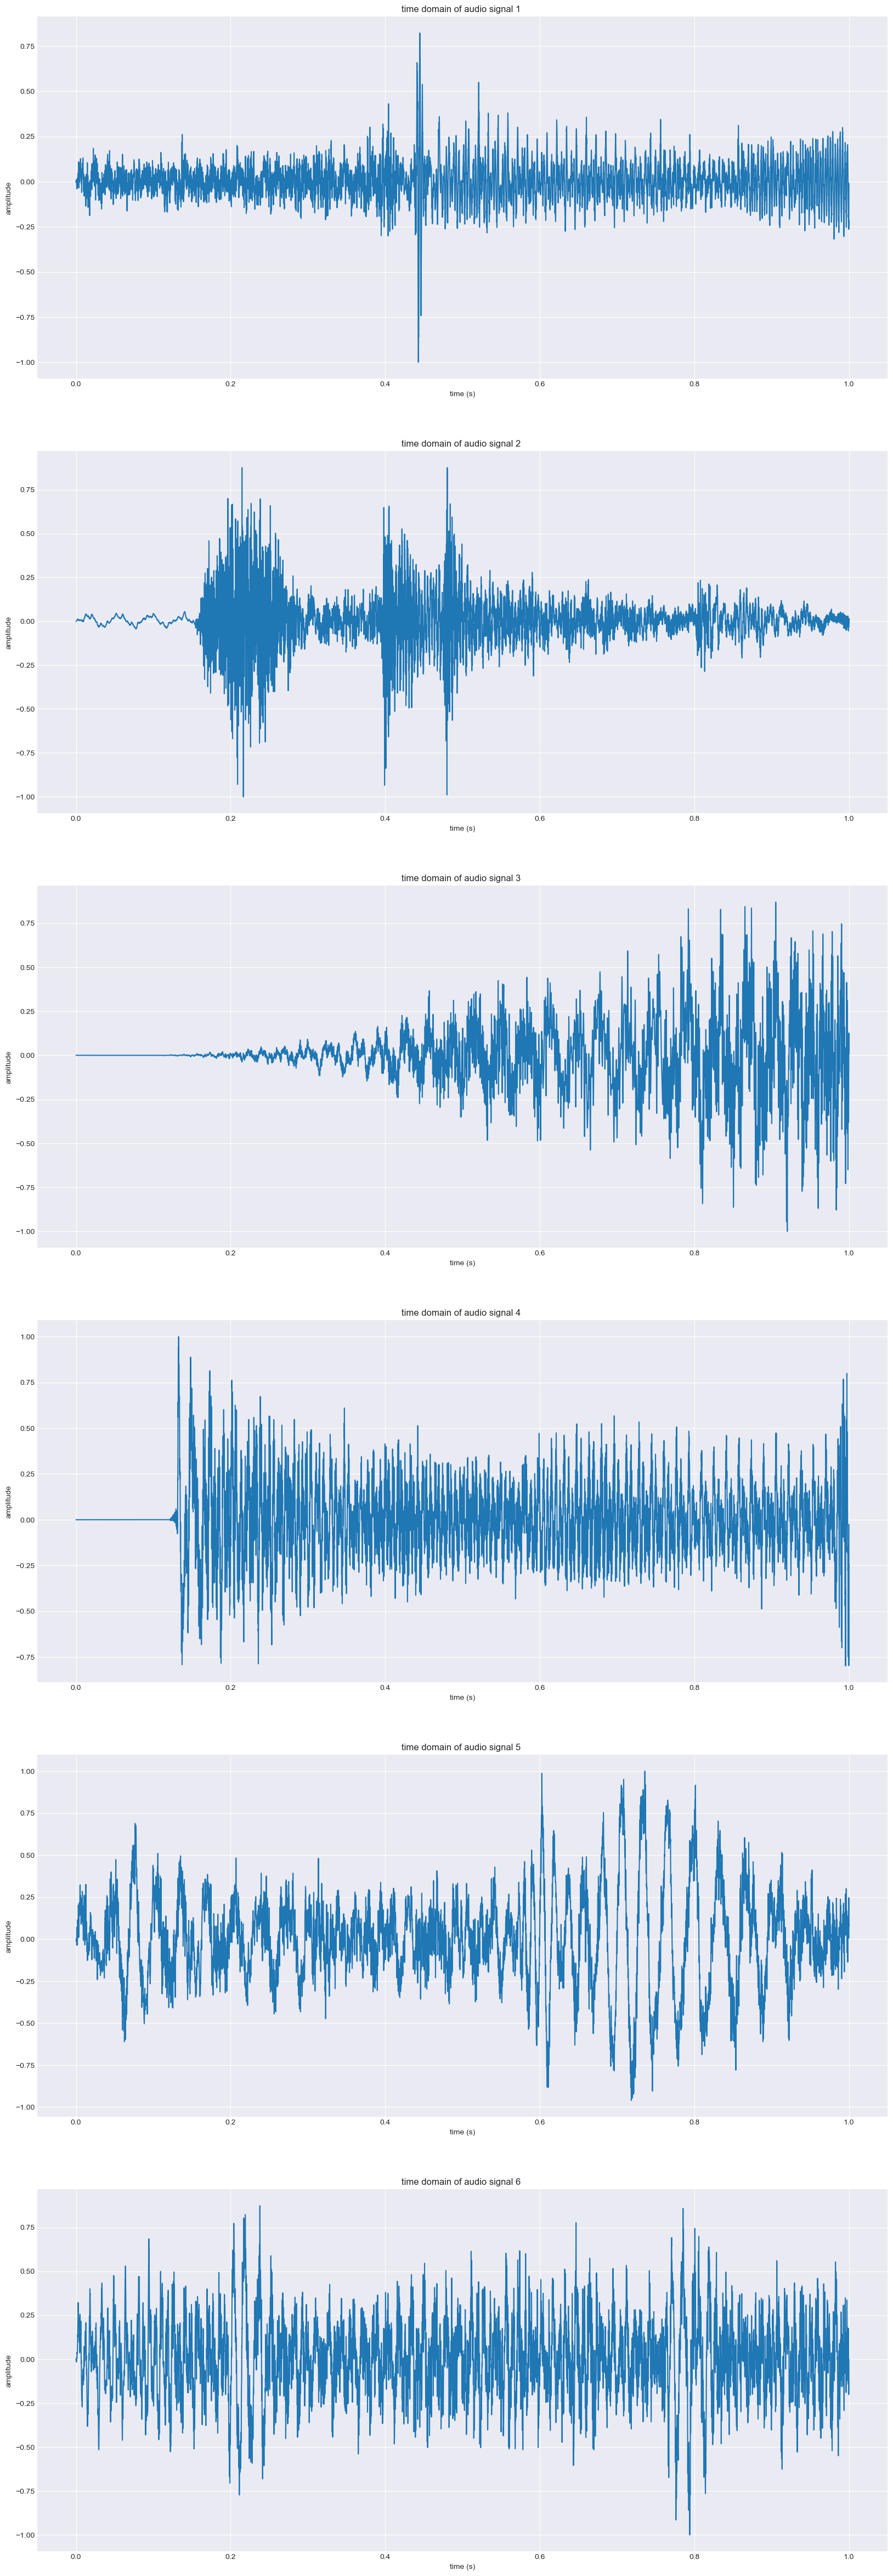

In [37]:
def plot_audio_vectors(signals, fs_simulation, duration, t):
    """
    Plots the audio vectors in both time and frequency domains.

    Parameters:
    - audio_vectors: Array of audio vectors to plot.
    - fs_simulation: The sampling frequency used for the simulation.
    - duration: Duration of the signals in seconds.
    - t: Time vector.
    """
    num_signals = len(signals)
    #plt.rcParams['figure.dpi'] = 100 

    plt.figure(figsize=(20, 10 * num_signals)) 
    for i, audio in enumerate(signals):
        plt.subplot(num_signals, 1, i+1,)
        plt.plot(t, audio)
        plt.title(f"time domain of audio signal {i+1} ")
        plt.xlabel("time (s)")
        plt.ylabel("amplitude")
        plt.grid(True)

    #plt.subplots_adjust(hspace=1)  
    plt.show()


plot_audio_vectors(audio_vectors, fs_simulation, duration, t)

C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


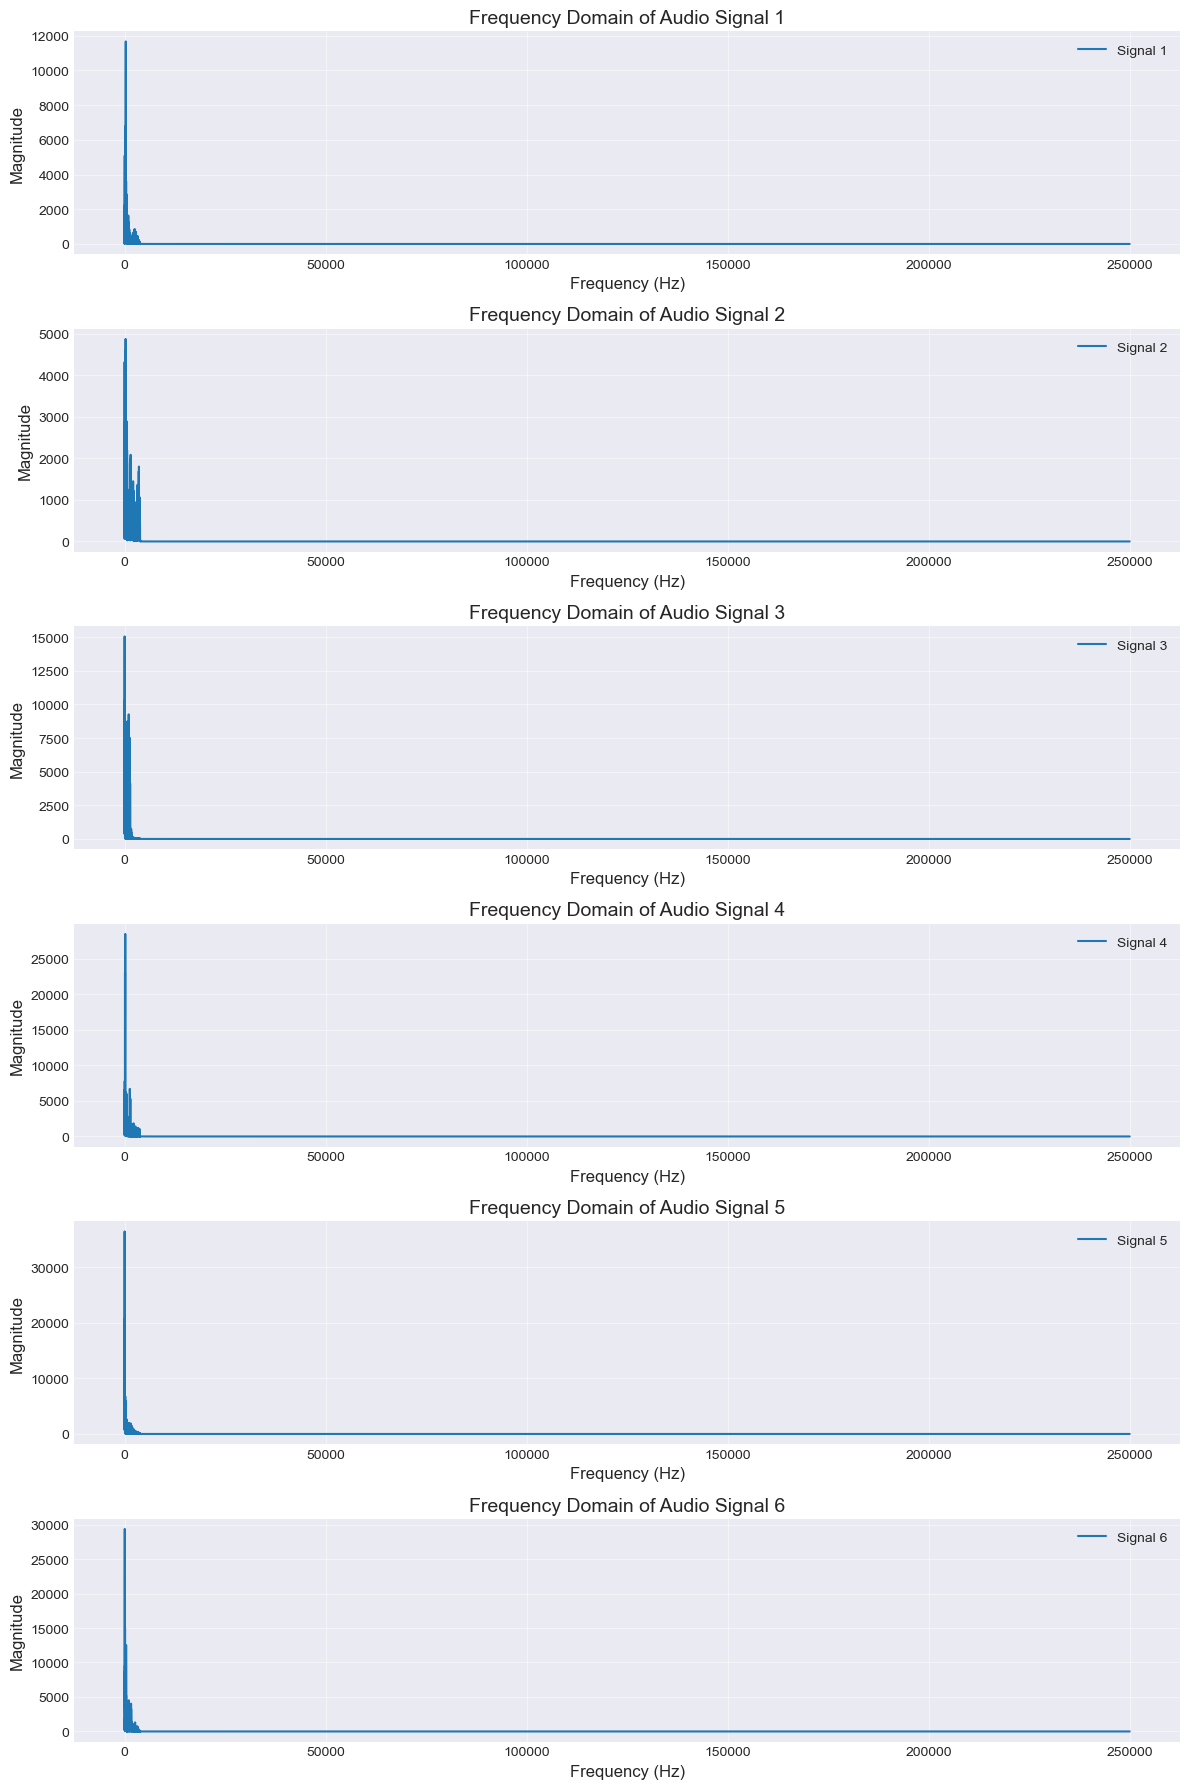

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_and_plot_fft(signals, fs_simulation, duration):
    """
    Calculates and plots the FFT of the given signals.

    Parameters:
    - signals: List of input signals to analyze.
    - fs_simulation: The sampling frequency used for the simulation.
    - duration: Duration of the signal in seconds.
    """
    num_signals = len(signals)
    plt.style.use('seaborn-darkgrid')
    
    # Increase figure size for better readability
    plt.figure(figsize=(12, 3 * num_signals))
    
    # Plot frequency-domain signals
    for i, audio in enumerate(signals):
        plt.subplot(num_signals, 1, i + 1)  # Create a subplot for each signal
        fft_vals = np.fft.fft(audio)  # Compute FFT
        freqs = np.fft.fftfreq(fft_vals.size, 1 / fs_simulation)  # Get frequency bins
        
        # Plot only the positive frequencies
        plt.plot(
            freqs[:len(freqs)//2], 
            np.abs(fft_vals)[:len(freqs)//2],
            label=f"Signal {i+1}",
            linewidth=1.5
        )
        
        # Customize each subplot
        plt.title(f"Frequency Domain of Audio Signal {i+1}", fontsize=14)
        plt.xlabel("Frequency (Hz)", fontsize=12)
        plt.ylabel("Magnitude", fontsize=12)
        plt.grid(True, alpha=0.5)  # Lighter grid for better visibility
        plt.legend(loc="upper right", fontsize=10)  # Add legend for each signal
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt
calculate_and_plot_fft(audio_vectors, fs_simulation, duration)

## Modulation

In this part, we will modulate the 6 audio signals to specific frequency bands within a defined bandwidth. Each audio signal occupies a baseband of $\dfrac{\text{target sr}}{2}$ Hz, but to avoid interference, we allocate `target_sr` Hz to each signal, with an additional `guard_width` Hz guard band between adjacent signals. The total bandwidth required for all 6 signals, including the guard bands, is:

$$
\text{Total Bandwidth} = (\text{target sr} \times 6) + (\text{guard width} \times 5)
$$

The modulation will shift each signal to a different center frequency, starting from a specified `center_freq`. The signals will be added sequentially to form a composite modulated signal.

- **Frequency Allocation:**
   - Each signal will be modulated to a frequency band separated by `target_sr`+ `guard_width` Hz (`target_sr` Hz for the signal and `guard_width` Hz for the guard band).
   - The first signal's center frequency will be `center_freq`, and subsequent signals will be shifted by `target_sr`+ `guard_width` Hz each.

- **Modulation Technique:**
   - Each baseband signal will be modulated by multiplying it with a cosine function of the form $ \cos(2 \pi f_0 t) $, where $ f_0 $ is the center frequency of the modulation.
   - This process shifts the signal from baseband to the specified frequency $ f_0 $.

- **Visualization:**
   - After each modulation step, we will plot the FFT of the composite signal to observe the changes in the frequency spectrum as more signals are added.


Modulated signal 1 at center frequency 125000.00 Hz
Modulated signal 2 at center frequency 143000.00 Hz
Modulated signal 3 at center frequency 161000.00 Hz


C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, the

Modulated signal 4 at center frequency 179000.00 Hz
Modulated signal 5 at center frequency 197000.00 Hz
Modulated signal 6 at center frequency 215000.00 Hz


C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, the

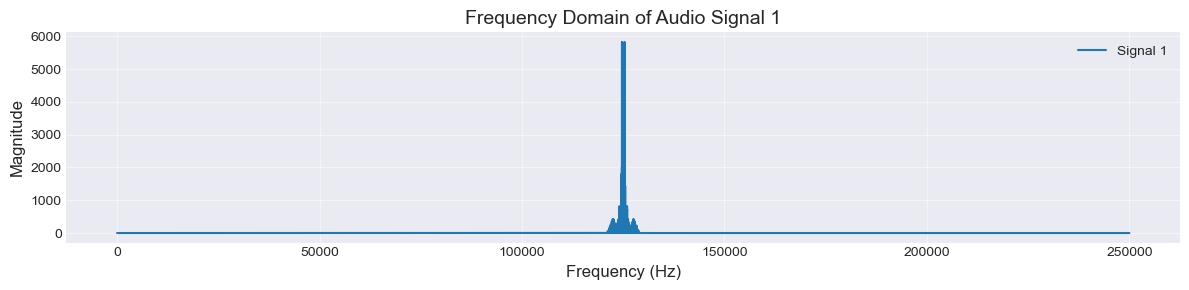

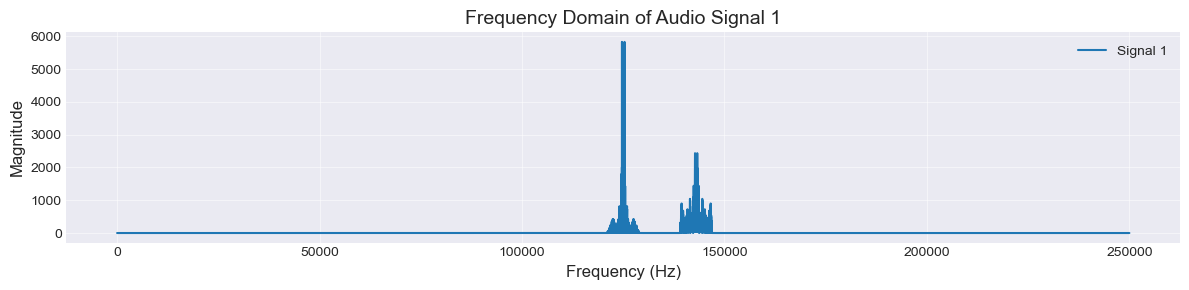

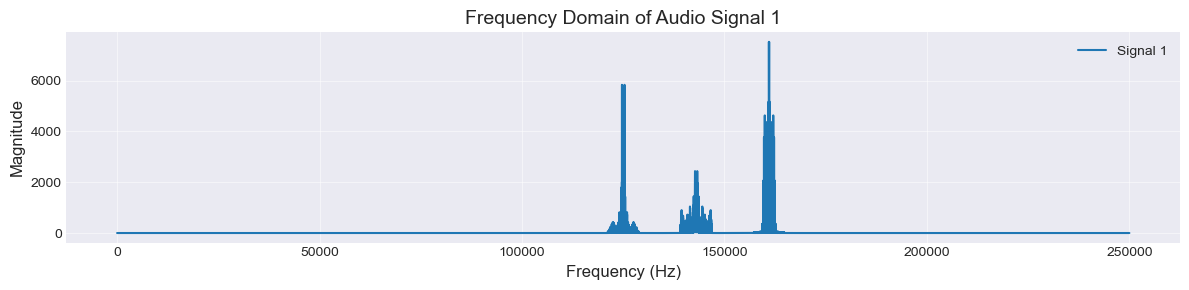

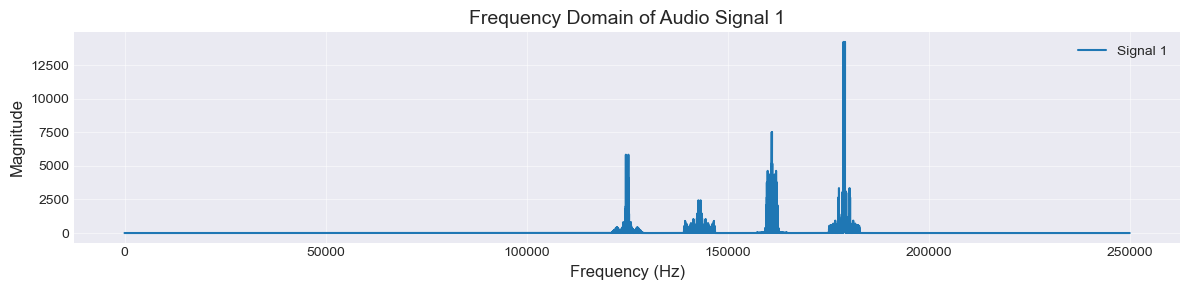

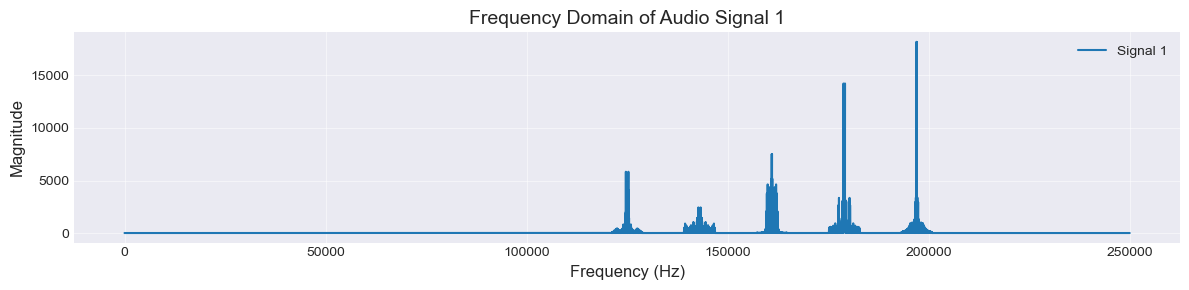

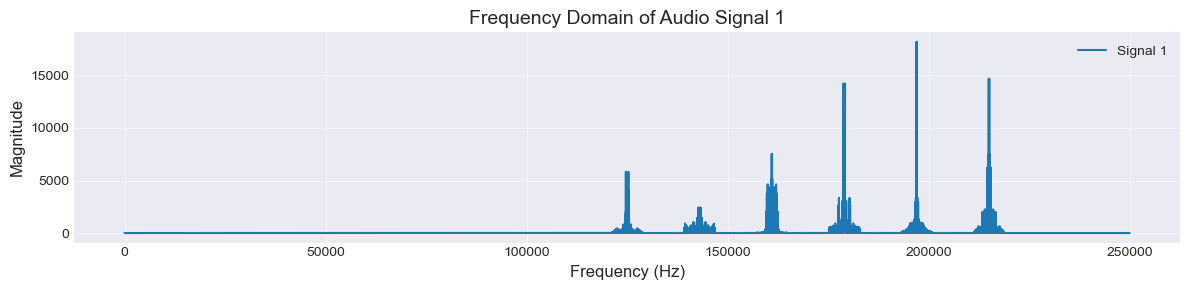

In [41]:
def modulate_signal(signal, fs_simulation, t, f_0):
    """
    Modulates a signal to a specified center frequency.

    Parameters:
    - signal: The baseband signal to modulate.
    - fs_simulation: The sampling frequency used for the simulation.
    - t: The time vector corresponding to the signal.
    - f_0: The center frequency to which the signal will be modulated.

    Returns:
    - modulated_signal: The modulated signal at frequency f_0.
    """
    # Modulate the signal by multiplying with a cosine function
    modulated_signal = signal*np.cos(2*np.pi*f_0*t)

    return modulated_signal

# Modulate each signal to its respective frequency and add to the composite signal
def modulate_all_signals(audio_vectors, fs_simulation, center_freq, duration, t, target_sr):
    """
    Modulates multiple signals to different frequency bands and forms a composite signal.

    Parameters:
    - audio_vectors: Array of baseband audio signals.
    - fs_simulation: The sampling frequency used for the simulation.
    - center_freq: The central frequency for modulation.
    - duration: Duration of the signals in seconds.
    - t: Time vector.
    - target_sr: sampling rate of signals
    Returns:
    - composite_signal: The combined modulated signal.
    """

    # Number of audio signals
    num_signals = 6
    guard_width = 2000
    # Calculate the start and end frequencies for modulation
    bandwidth  = guard_width+target_sr
    start_freq = center_freq-bandwidth   # Start frequency
    end_freq   = center_freq+bandwidth  # End frequency

    # Generate the vector of modulation frequencies
    f_0_vector =[125000+i*(2*bandwidth-guard_width) for i in range(len(audio_vectors))]

    # Initialize the composite signal
    composite_signal = np.zeros(t.size)

    # Modulate each signal to its respective frequency band
    for i, (audio, f_0) in enumerate(zip(audio_vectors, f_0_vector)):
        # Modulate the signal to the corresponding frequency f_0
        modulated_signal = modulate_signal(audio,fs_simulation,t,f_0_vector[i])
        # Add the modulated signal to the composite signal
        composite_signal += modulated_signal

        # Plot FFT after adding each signal
        print(f"Modulated signal {i+1} at center frequency {f_0:.2f} Hz")
        calculate_and_plot_fft([composite_signal], fs_simulation, duration)

    return composite_signal, f_0_vector

composite_signal , center_freqs = modulate_all_signals(audio_vectors,fs_simulation,center_freq,duration,t,target_sr)

## Ideal Channel Processing

In this section, we’ll extract a specific modulated signal from a composite signal by using an ideal bandpass filter in combination with a low-pass filter. Since only one bandpass filter is available, we’ll first translate each selected signal to a common intermediate frequency (IF) for filtering. The process involves three primary steps: frequency translation, bandpass filtering, and finally returning the signal to baseband using a low-pass filter.

- **Frequency Translation**:
   - To isolate a target signal from the composite mix, we first translate its frequency to a shared intermediate frequency, $ f' $, set at 100 kHz. This frequency shift ensures that our single bandpass filter, centered at $ f' $, can process different signals by moving each one to this common frequency.
   - The translation is done by multiplying the signal with a cosine wave at frequency $ |f - f'| $, where $ f $ is the original center frequency of the desired signal. By adjusting whether we add or subtract $ f' $, we can either up-convert or down-convert the signal as needed based on its position relative to $ f' $.

- **Bandpass Filtering**:
   - With the target signal shifted to the intermediate frequency, we apply our ideal bandpass filter, centered at $ f' $ with bandwidth $ B $. This bandpass filter selectively isolates the signal within the specified bandwidth, effectively filtering out other frequencies in the composite signal.

- **Return to Baseband Using Low-Pass Filtering**:
   - After filtering at the intermediate frequency, we shift the signal back to baseband (to 0 Hz) by multiplying it with a cosine wave at frequency $ f' $, effectively demodulating the signal to its original form.
   - Finally, we apply a low-pass filter to retain only the baseband components, removing any higher frequencies introduced during the demodulation process. This low-pass filter restores the signal to its original frequency range, completing the extraction and isolation of the target signal.

Processing channel 1 with center frequency 125000.00 Hz
25000


C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, the

Processing channel 2 with center frequency 143000.00 Hz
43000


C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Processing channel 3 with center frequency 161000.00 Hz
61000


C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, the

Processing channel 4 with center frequency 179000.00 Hz
79000


C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, the

Processing channel 5 with center frequency 197000.00 Hz
97000


C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, the

Processing channel 6 with center frequency 215000.00 Hz
115000


C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, the

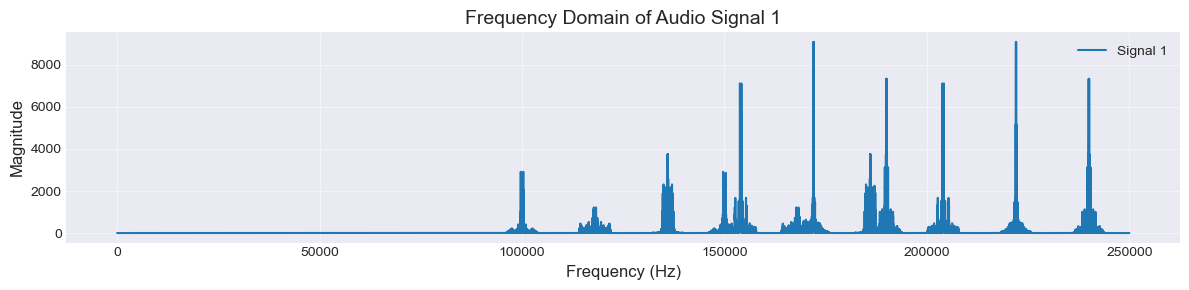

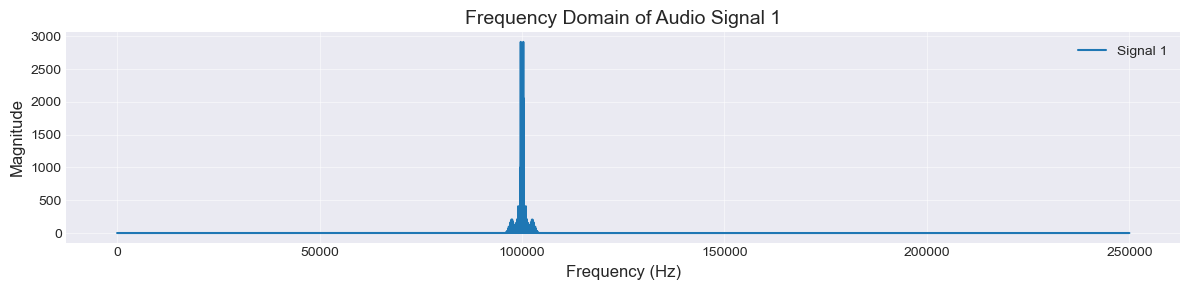

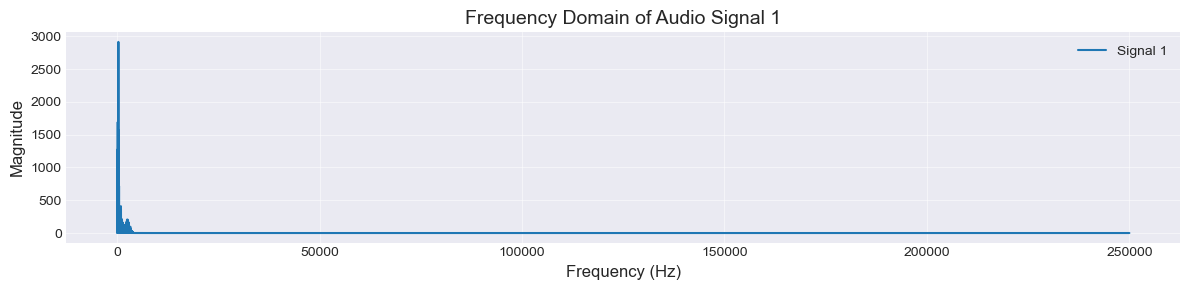

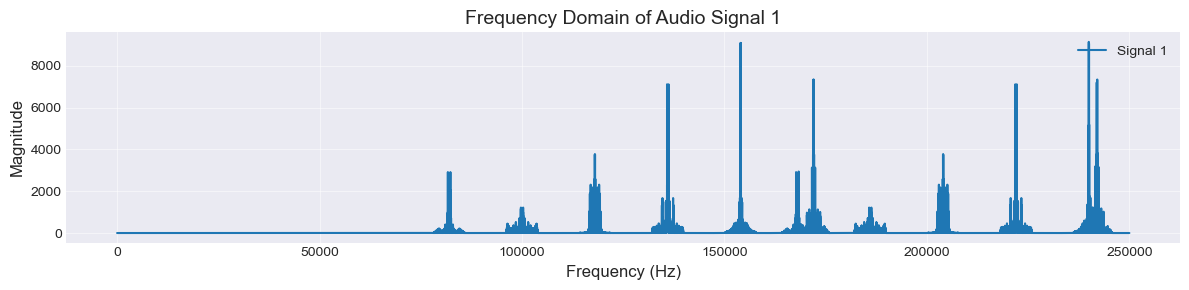

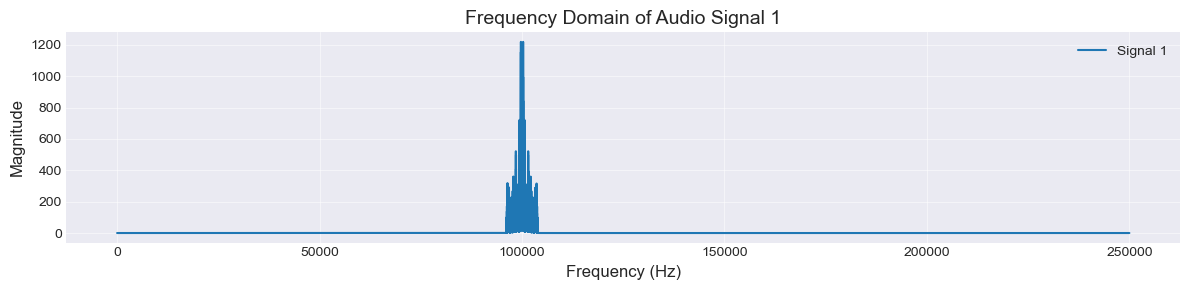

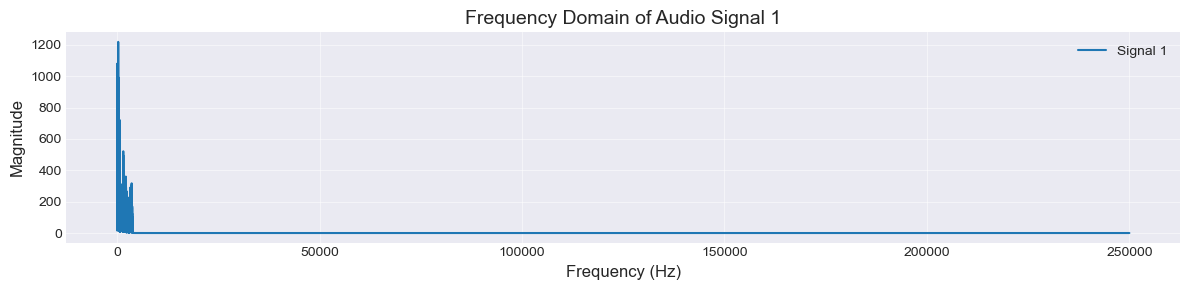

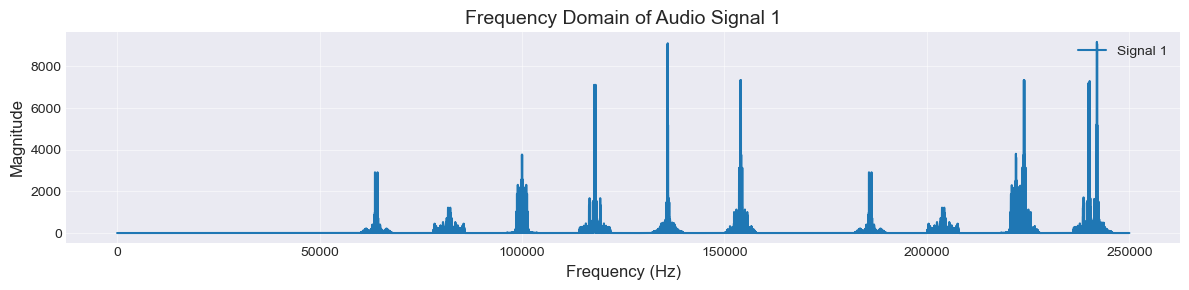

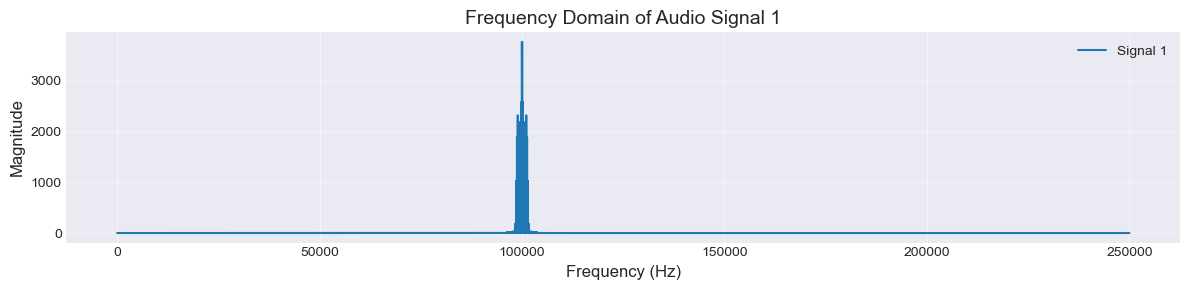

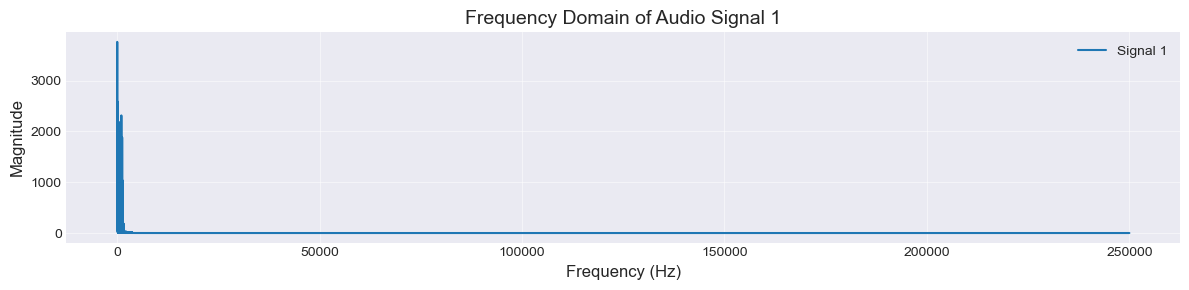

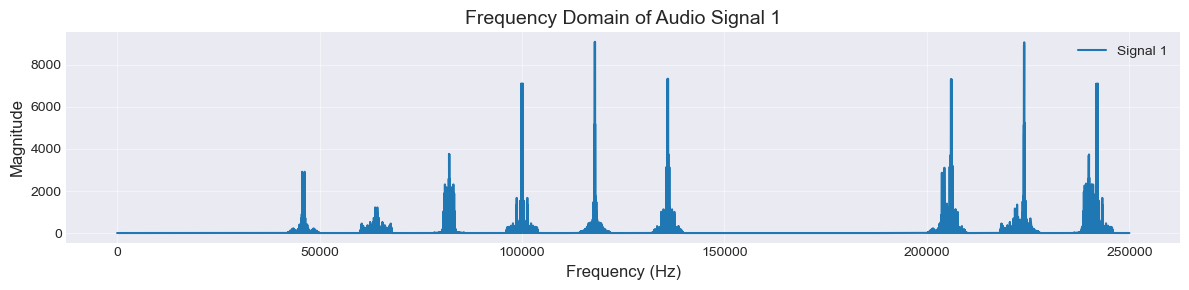

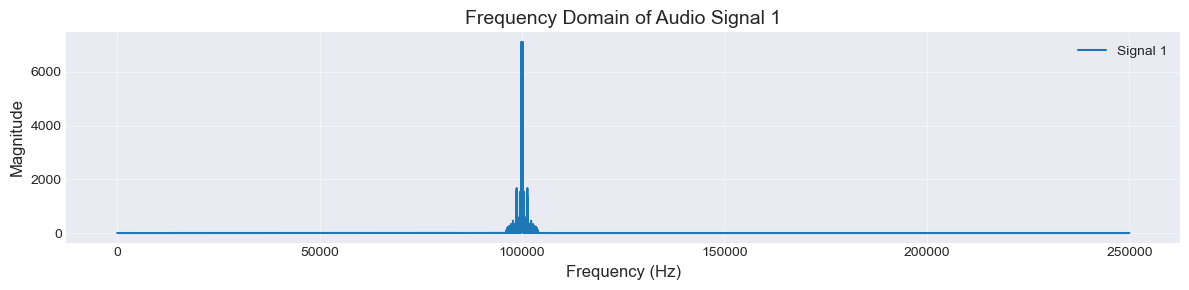

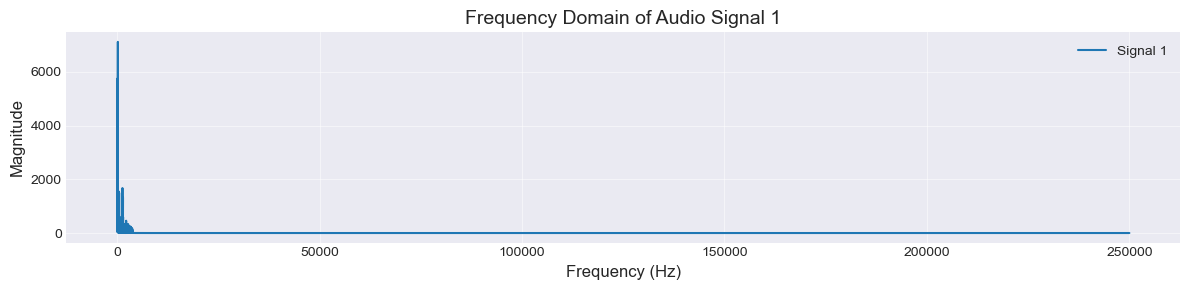

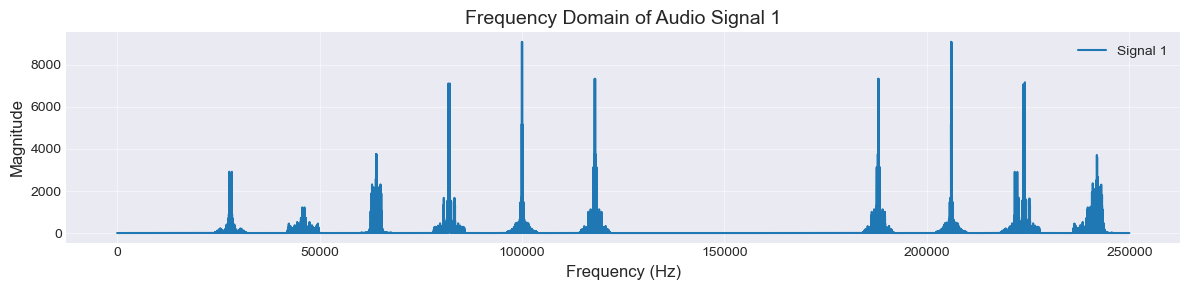

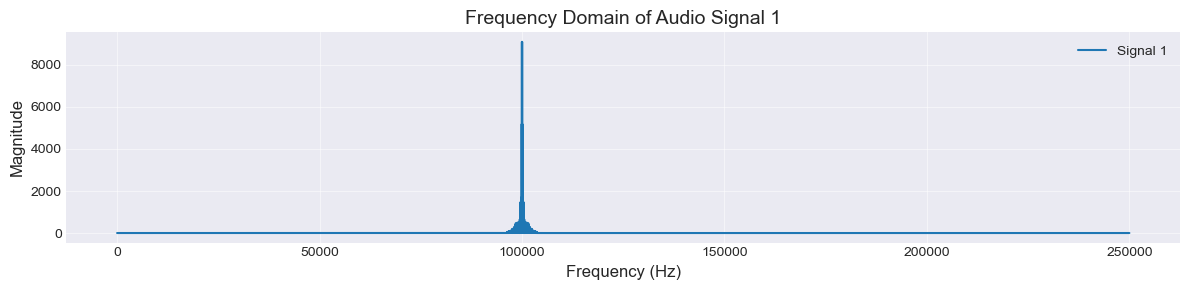

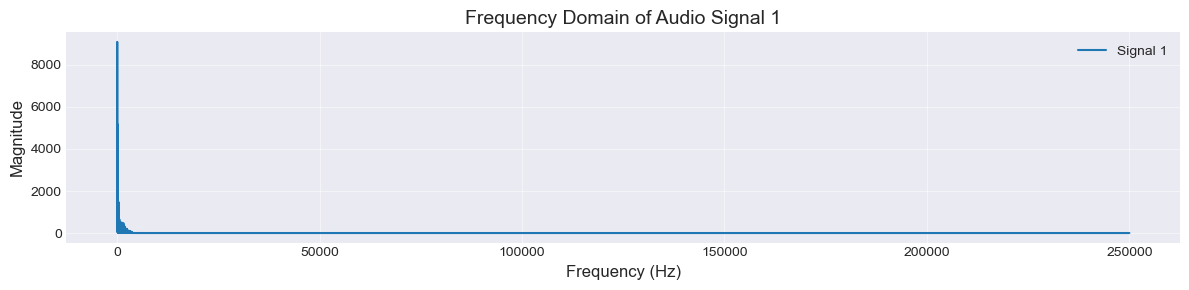

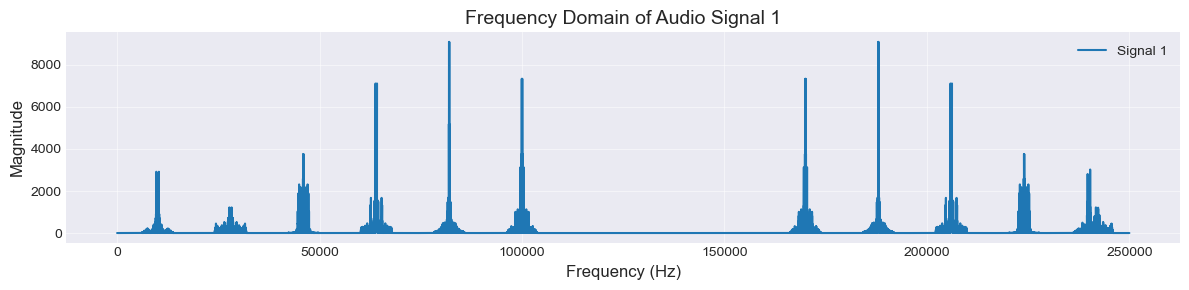

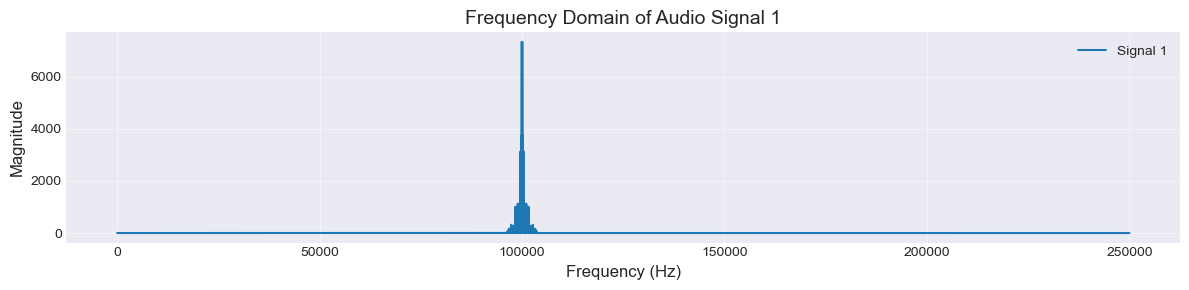

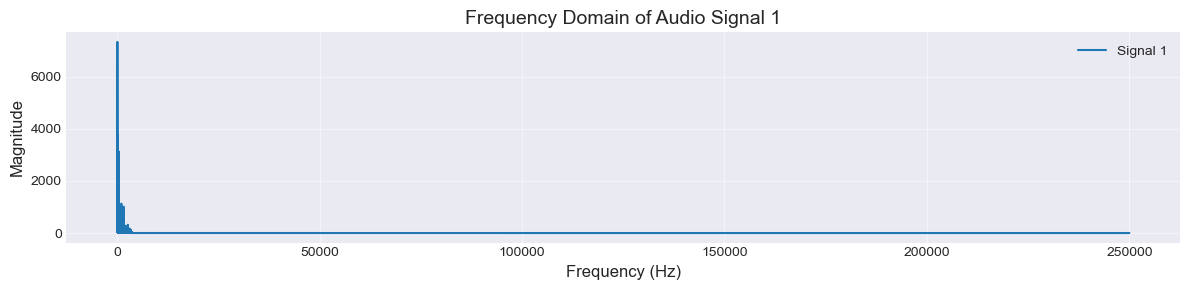

In [43]:
def ideal_channel_filter(composite_signal, fs_simulation, center_freq, target_freq, bandwidth, t):
    """
    Extracts a specific channel from the composite signal using an ideal bandpass filter.

    Parameters:
    - composite_signal: The combined modulated signal.
    - fs_simulation: The sampling frequency used for the simulation.
    - center_freq: The center frequency of the desired channel.
    - target_freq: The target frequency for the intermediate filter (f').
    - bandwidth: The bandwidth of the ideal bandpass filter.
    - t: Time vector.

    Returns:
    - baseband_signal: The extracted baseband signal.
    """


    # Move the signal to the intermediate frequency
    translated_signal = composite_signal*np.cos(2*np.pi*t*(center_freq-target_freq))
    # Plot FFT of the modulated signal
    print((center_freq-target_freq))
    calculate_and_plot_fft(translated_signal,fs_simulation,duration)

    # Apply an ideal bandpass filter centered at target_freq with bandwidth B
    nyquist_rate = fs_simulation / 2
    low_cutoff = (target_freq - bandwidth / 2) / nyquist_rate
    high_cutoff = (target_freq + bandwidth / 2) / nyquist_rate
    b, a = signal.butter(N=4, Wn=[low_cutoff, high_cutoff], btype='band')
    filtered_signal = signal.filtfilt(b, a, translated_signal)

    # Plot FFT of the filtered signal
    calculate_and_plot_fft(filtered_signal,fs_simulation,duration)

    # Move the filtered signal back to baseband
    baseband_signal = filtered_signal*np.cos(2*np.pi*target_freq*t)

    # Apply a low-pass filter to remove extra data
    lp_cutoff = 3 * bandwidth / nyquist_rate
    b_lp, a_lp = signal.butter(N=4, Wn=lp_cutoff, btype='low')
    baseband_signal = signal.filtfilt(b_lp, a_lp, baseband_signal)

    # Plot FFT of the baseband signal after low-pass filtering
    calculate_and_plot_fft(baseband_signal, fs_simulation, len(t) / fs_simulation)

    return baseband_signal

def process_all_channels(composite_signal, fs_simulation, center_freqs, target_freq, bandwidth, t):
    """
    Processes all modulated channels from the composite signal, applies the ideal filter,
    and saves the extracted baseband signals in a new array.

    Parameters:
    - composite_signal: The combined modulated signal.
    - fs_simulation: The sampling frequency used for the simulation.
    - center_freqs: The center frequencies of each modulated channel.
    - target_freq: The intermediate frequency for the ideal filter.
    - bandwidth: The bandwidth of the ideal filter.
    - t: Time vector.

    Returns:
    - baseband_signals: An array containing the extracted baseband signals for each channel.
    """
    baseband_signals = []

    for i, center_freq in enumerate(center_freqs):
        print(f"Processing channel {i+1} with center frequency {center_freq:.2f} Hz")

        # Apply the ideal filter to extract the channel
        baseband_signal = ideal_channel_filter(composite_signal,fs_simulation,center_freqs[i],target_freq,bandwidth,t)

        # Store the extracted baseband signal
        baseband_signal = normalize_audio(baseband_signal)
        baseband_signals.append(baseband_signal[0])

    # Convert the list to a numpy array
    baseband_signals = np.array(baseband_signals)

    return baseband_signals

bandwidth   = 8000      # bandwidth for each channel (8 kHz)
target_freq = 100000      # Target intermediate frequency (100 kHz)
baseband_signals = process_all_channels([composite_signal],fs_simulation,center_freqs,target_freq,bandwidth,t)


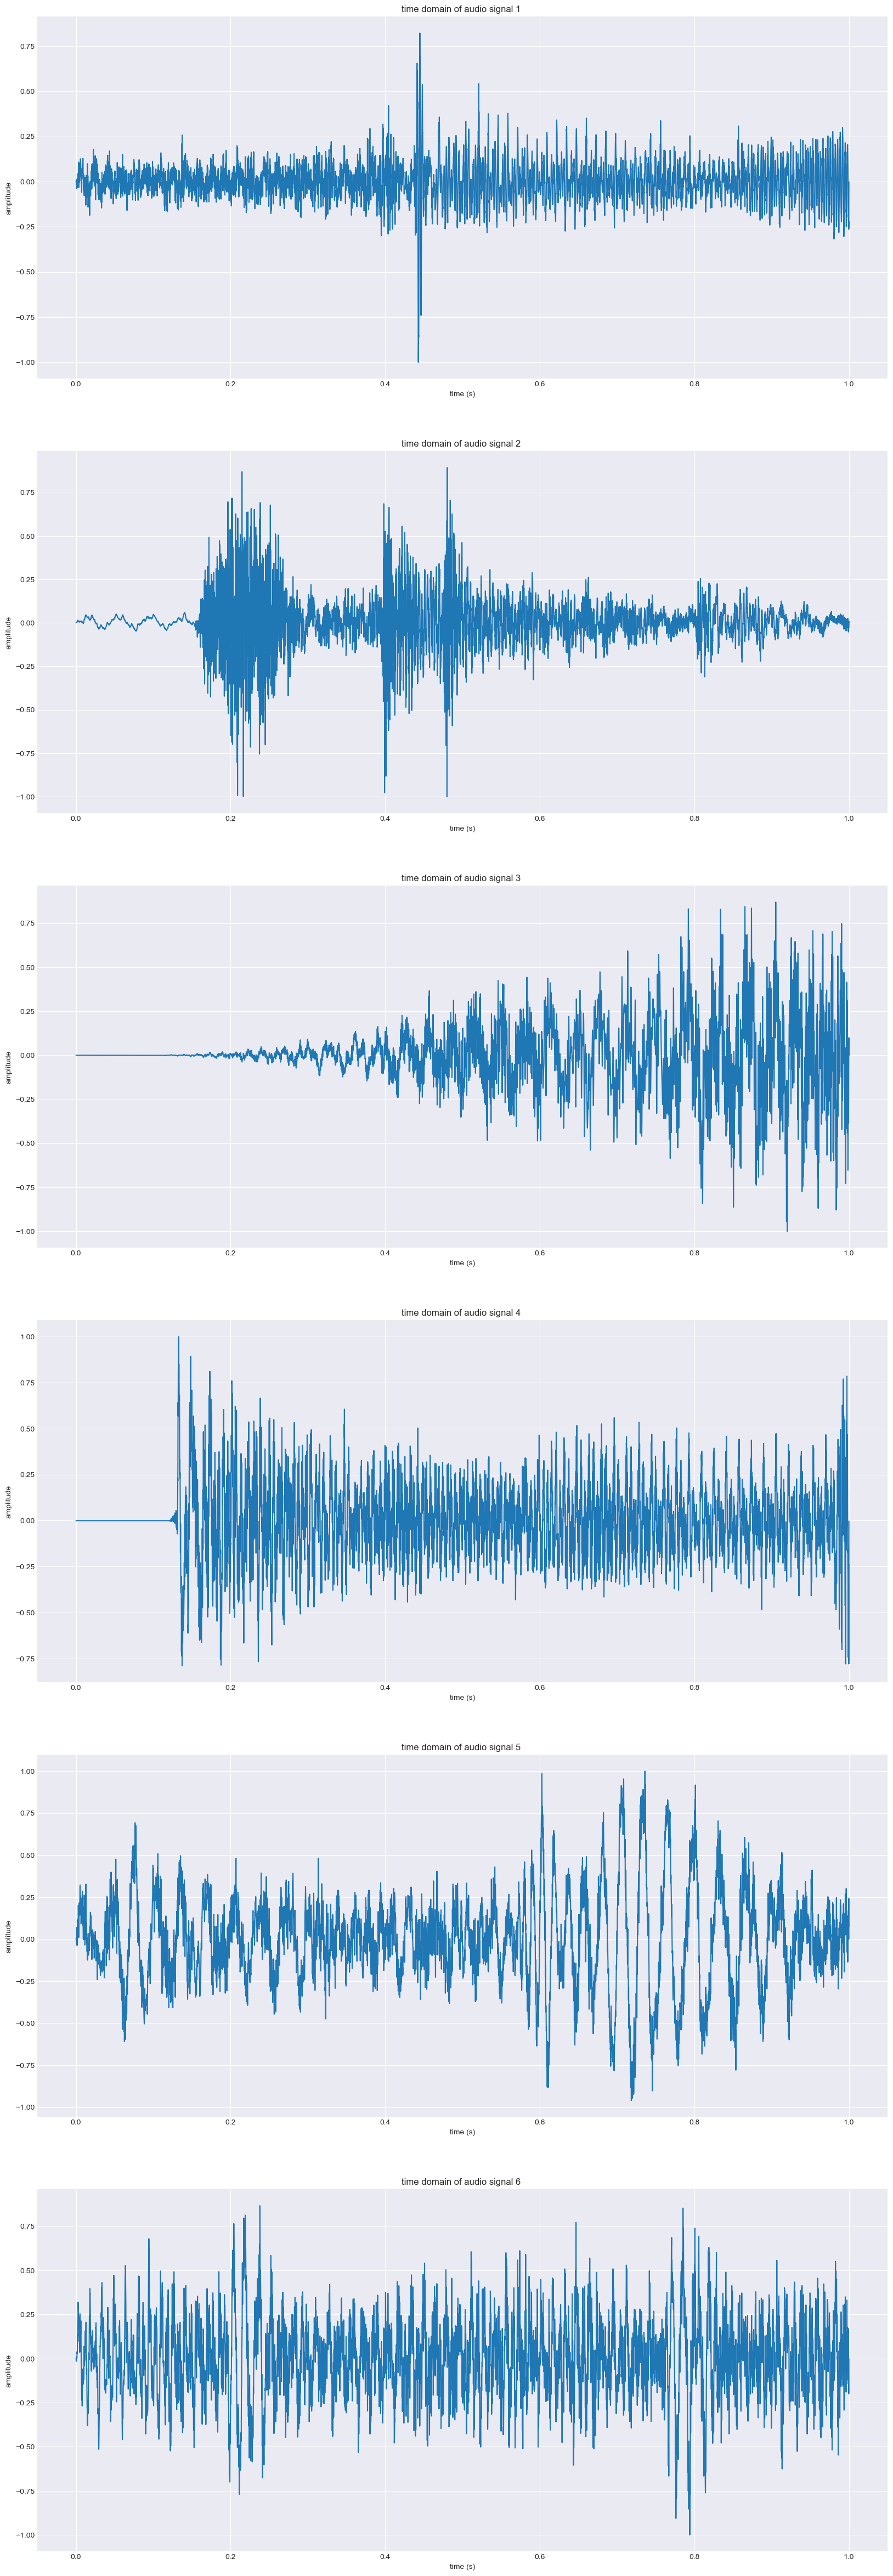

In [47]:
plot_audio_vectors(baseband_signals,fs_simulation,duration,t)


## Calculating the Error Between Extracted Baseband Signals and Original Audio Signals

After filtering each modulated signal back to baseband, the extracted baseband signals are stored in `baseband_signals`, and the original audio vectors are stored in `audio_vectors`. To evaluate the performance of the modulation and filtering process, we need to calculate the error between each baseband signal and its corresponding original audio vector. This will help us understand the quality of the extracted signals and assess if they retain the original audio characteristics. We will calculate the mean squared error (MSE) as a measure of error.


In [45]:
def calculate_errors(original_vectors, extracted_signals):
    """
    Calculates the Mean Squared Error (MSE) between each original audio vector and its corresponding extracted baseband signal.

    Parameters:
    - original_vectors: Array of original audio vectors before modulation.
    - extracted_signals: Array of extracted baseband signals after modulation and filtering.

    Returns:
    - errors: List of MSE values for each channel.
    """
    errors = []
    for i in range(min(len(original_vectors), len(extracted_signals))):
        # Calculate MSE for each pair of original and extracted signals
        mse = mean_squared_error(original_vectors,extracted_signals)
        errors.append(mse)
        print(f"MSE for channel {i+1}: {mse:.4f}")

    return errors

# Calculate and print the error for each audio channel
errors = calculate_errors(audio_vectors,baseband_signals)



MSE for channel 1: 0.0000
MSE for channel 2: 0.0000
MSE for channel 3: 0.0000
MSE for channel 4: 0.0000
MSE for channel 5: 0.0000
MSE for channel 6: 0.0000


## Downsampling and Saving the Extracted Signals

After extracting the baseband signals, the next step is to downsample them to a lower sampling rate suitable for audio playback. Since the signals have been processed with a much higher simulation sampling rate (`fs_simulation`), we need to reduce the sampling rate to make the data manageable while still retaining the quality of the audio signals.

The process involves:
1. **Downsampling**:
   - Reduce the sampling rate from the high simulation rate (`fs_simulation`) to a lower target rate, such as `target_sr` Hz, which is more suitable for audio playback.
   - This step includes anti-aliasing filtering to avoid distortion during downsampling.

2. **Saving the Downsampled Signals**:
   - Save each downsampled signal as a separate audio file in a suitable format (e.g., WAV) for easy playback and storage.


In [49]:
def downsample_signal(signal, original_fs, target_fs):
    downsample_factor = int(original_fs / target_fs)
    downsampled_signal = signal[::downsample_factor]

    # Scale the downsampled signal to the range [-1, 1]
    max_val = np.max(np.abs(downsampled_signal))
    if max_val != 0:
        downsampled_signal = downsampled_signal / max_val

    return downsampled_signal

def process_and_save_audio(baseband_signals, fs_simulation, target_sampling_rate,title):
    downsampled_signals = []

    for i, signal in enumerate(baseband_signals):
        downsampled_signal = downsample_signal(signal, fs_simulation, target_sampling_rate)

        # Save the downsampled signal using soundfile
        file_name = f"{title} downsampled_signal_{i+1}.wav"
        sf.write(file_name, downsampled_signal, target_sampling_rate)
        print(f"Downsampled signal {i+1} saved as {file_name}.")

        downsampled_signals.append(downsampled_signal)

    downsampled_signals = np.array(downsampled_signals)


    return downsampled_signals

# save audio
downsampled_signals = process_and_save_audio(baseband_signals,fs_simulation,target_sr,"output")

Downsampled signal 1 saved as output downsampled_signal_1.wav.
Downsampled signal 2 saved as output downsampled_signal_2.wav.
Downsampled signal 3 saved as output downsampled_signal_3.wav.
Downsampled signal 4 saved as output downsampled_signal_4.wav.
Downsampled signal 5 saved as output downsampled_signal_5.wav.
Downsampled signal 6 saved as output downsampled_signal_6.wav.


# Question 2

### Nonlinear Channel and Signal Recovery Process

In this question, we simulate a nonlinear communication channel using a given channel model and a set of modulated signals. The nonlinear channel model we will use is defined by the equation:
$$
y(t) = a \cdot x(t) + b \cdot x^2(t)
$$
where $ a $ and $ b $ are constants defining the channel characteristics. Due to the nonlinearity of this model, additional frequency components will be introduced, effectively doubling the bandwidth requirements of each modulated signal.


Signal 1 modulated at frequency 125000 Hz
Signal 2 modulated at frequency 139000 Hz
Signal 3 modulated at frequency 153000 Hz


C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


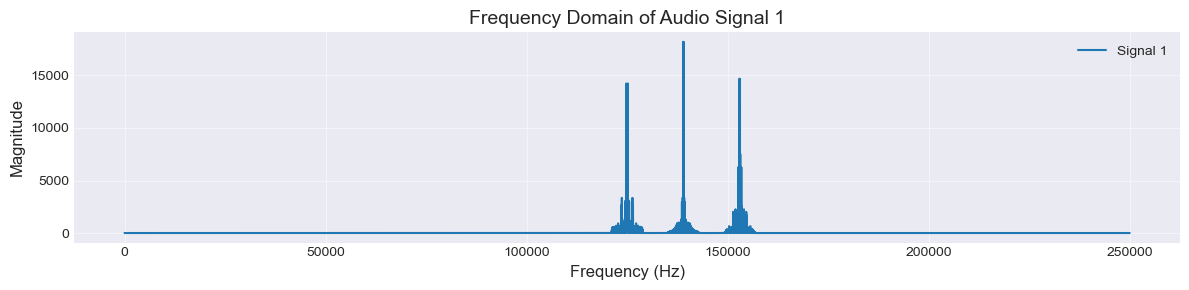

In [51]:
# Define parameters for modulation
center_freq = 125000
guard_width = 2000   
carrier_frequencies = [125000+i*(2*bandwidth-guard_width) for i in range(3)]  # Three distinct center frequencies

# Select the first three signals for modulation
selected_audio_vectors = audio_vectors[3:6]  # Select three audio signals

# Modulate each of the selected signals
modulated_signals = np.zeros_like(t)
for i, (audio, f_0) in enumerate(zip(selected_audio_vectors, carrier_frequencies)):
    modulated_signals += modulate_signal(audio,fs_simulation,t,f_0)
    print(f"Signal {i+1} modulated at frequency {f_0} Hz")


calculate_and_plot_fft([modulated_signals],fs_simulation,duration)

C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


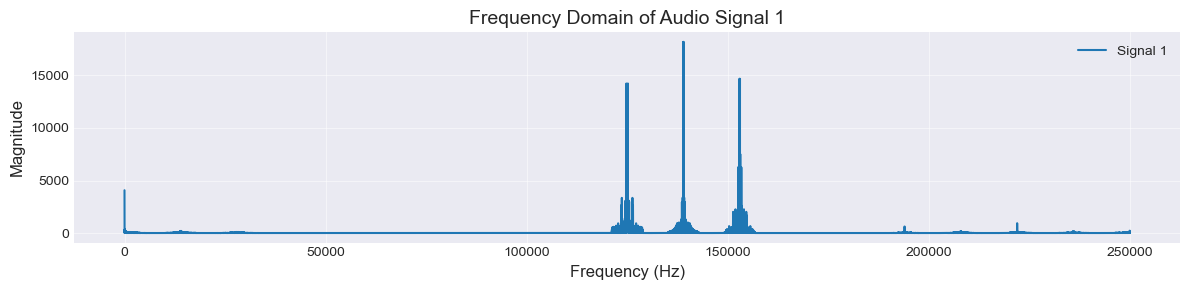

In [55]:
# Define the nonlinear channel parameters
a = 1  # Linear component coefficient
b = 0.1  # Nonlinear component coefficient

def nonlinear_channel(input_signal, a, b):
    """
    Applies a nonlinear channel model to the input signal.

    Parameters:
    - input_signal: The modulated signal to be processed.
    - a: Linear component coefficient.
    - b: Nonlinear component coefficient.

    Returns:
    - output_signal: The signal after passing through the nonlinear channel.
    """
   
    # Nonlinear transformation
    output_signal = a * input_signal + b * (input_signal ** 2)
    return output_signal



# Apply the nonlinear channel to the modulated signal
nonlinear_signals = nonlinear_channel(modulated_signals, a, b)

# Plot FFT of the signals after the nonlinear channel
calculate_and_plot_fft([nonlinear_signals],fs_simulation,duration)


C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, the

Processing channel 1 with center frequency 125000.00 Hz
25000


C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Processing channel 2 with center frequency 139000.00 Hz
39000


C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, the

Processing channel 3 with center frequency 153000.00 Hz
53000


C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\3026478706.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


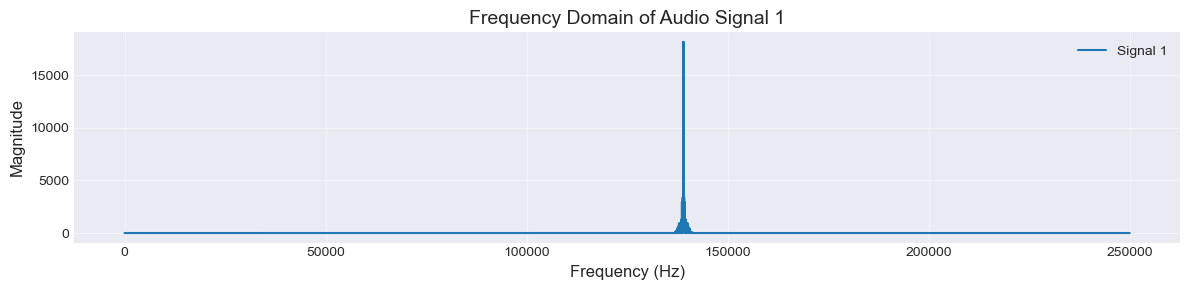

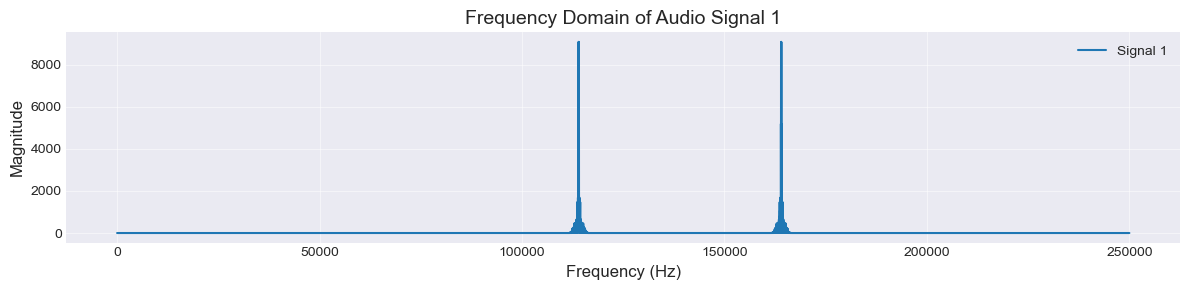

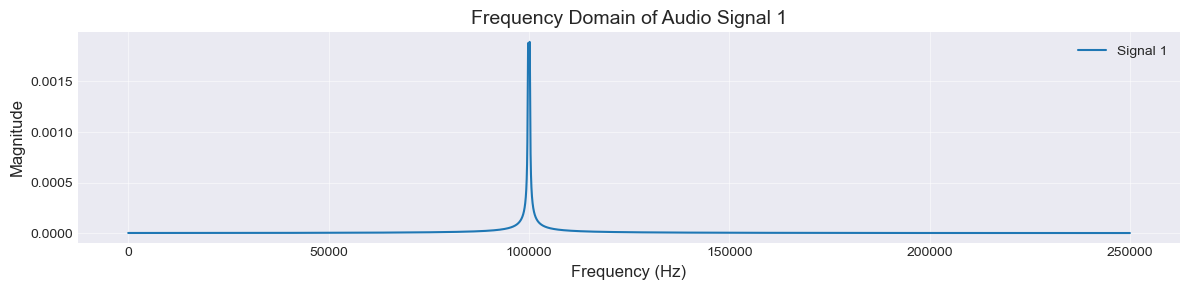

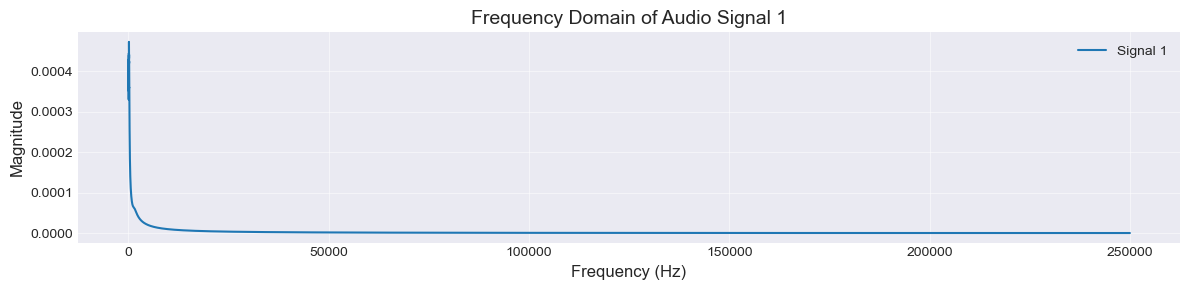

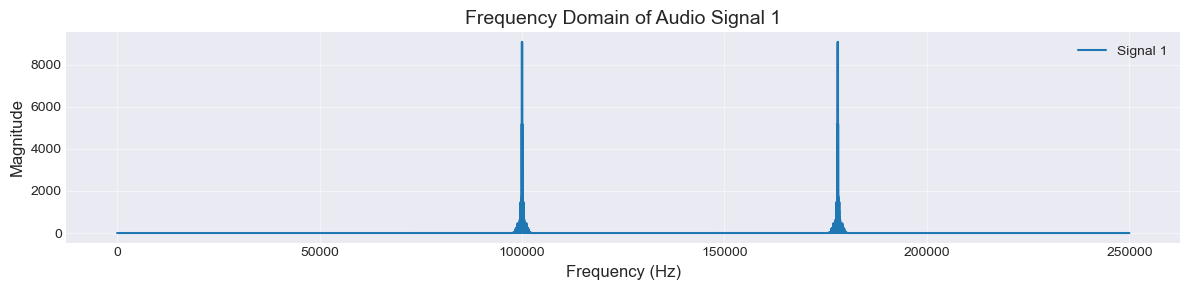

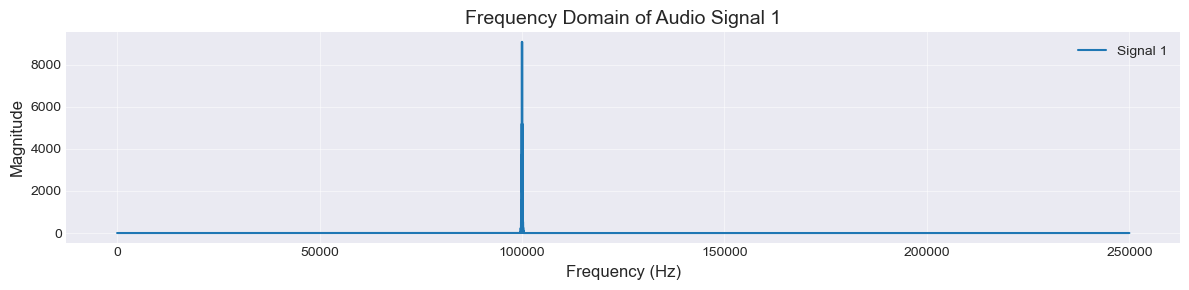

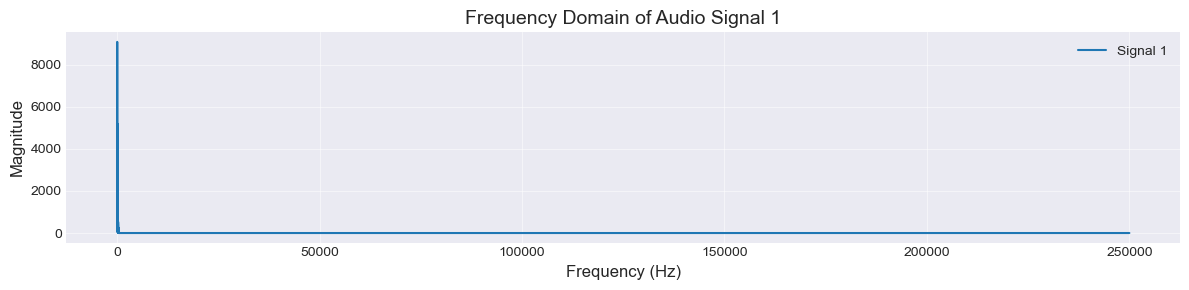

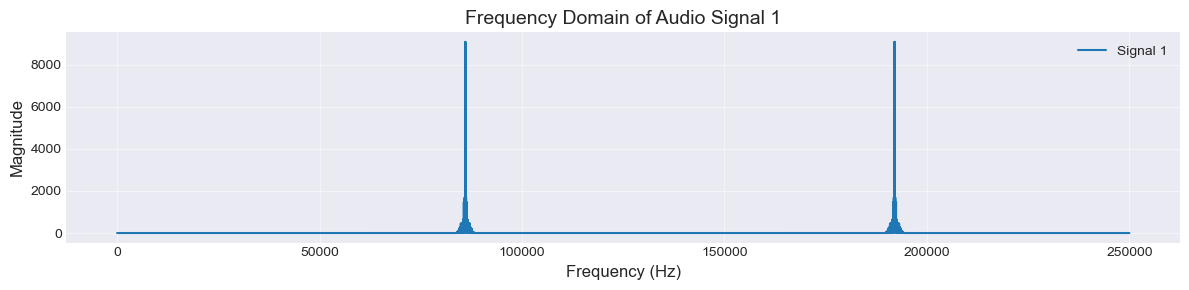

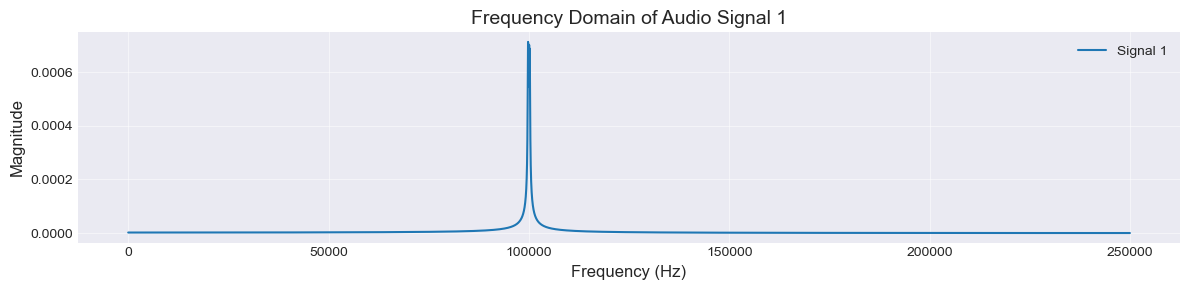

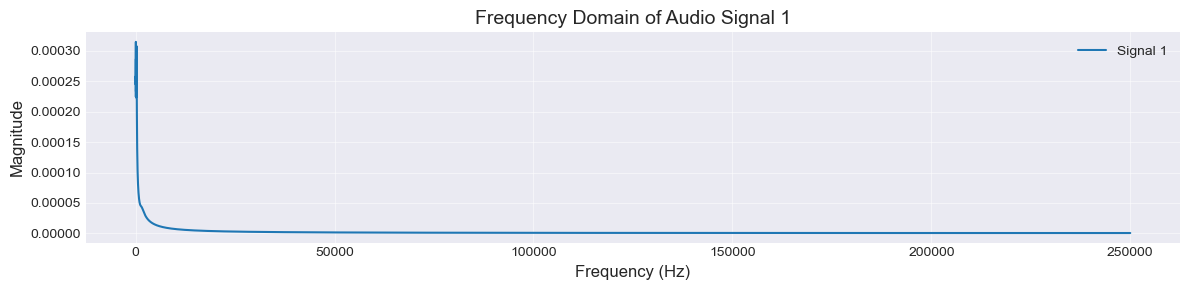

In [59]:
def process_all_channels_nonlinear(composite_signal, fs_simulation, center_freqs, target_freq, bandwidth, t):
    """
    Processes all modulated channels from the composite signal, applies the ideal filter,
    and saves the extracted baseband signals in a new array.

    Parameters:
    - composite_signal: The combined modulated signal.
    - fs_simulation: The sampling frequency used for the simulation.
    - center_freqs: The center frequencies of each modulated channel.
    - target_freq: The intermediate frequency for the ideal filter.
    - bandwidth: The bandwidth of the ideal filter.
    - t: Time vector.

    Returns:
    - baseband_signals: An array containing the extracted baseband signals for each channel.
    """
    baseband_signals = []

    # Apply an ideal bandpass filter centered at target_freq[1]
    nyquist_rate = fs_simulation / 2
    low_cutoff = (center_freqs[1]  - 3*bandwidth) / nyquist_rate
    high_cutoff = (center_freqs[1] + 3*bandwidth) / nyquist_rate
    b, a = signal.butter(N=4, Wn=[low_cutoff, high_cutoff], btype='band')
    composite_signal = signal.filtfilt(b, a, composite_signal)

    calculate_and_plot_fft(composite_signal,fs_simulation,duration)

    for i, center_freq in enumerate(center_freqs):
        print(f"Processing channel {i+1} with center frequency {center_freq:.2f} Hz")

        # Apply the ideal filter to extract the channel
        baseband_signal = ideal_channel_filter(composite_signal,fs_simulation,center_freq,target_freq,bandwidth,t)

        # Store the extracted baseband signal
        baseband_signal = normalize_audio(baseband_signal)
        baseband_signals.append(baseband_signal[0])

    # Convert the list to a numpy array
    baseband_signals = np.array(baseband_signals)

    return baseband_signals
target_freq = 100000
baseband_signals_non_linear = process_all_channels_nonlinear([nonlinear_signals],fs_simulation,carrier_frequencies,target_freq,bandwidth,t)

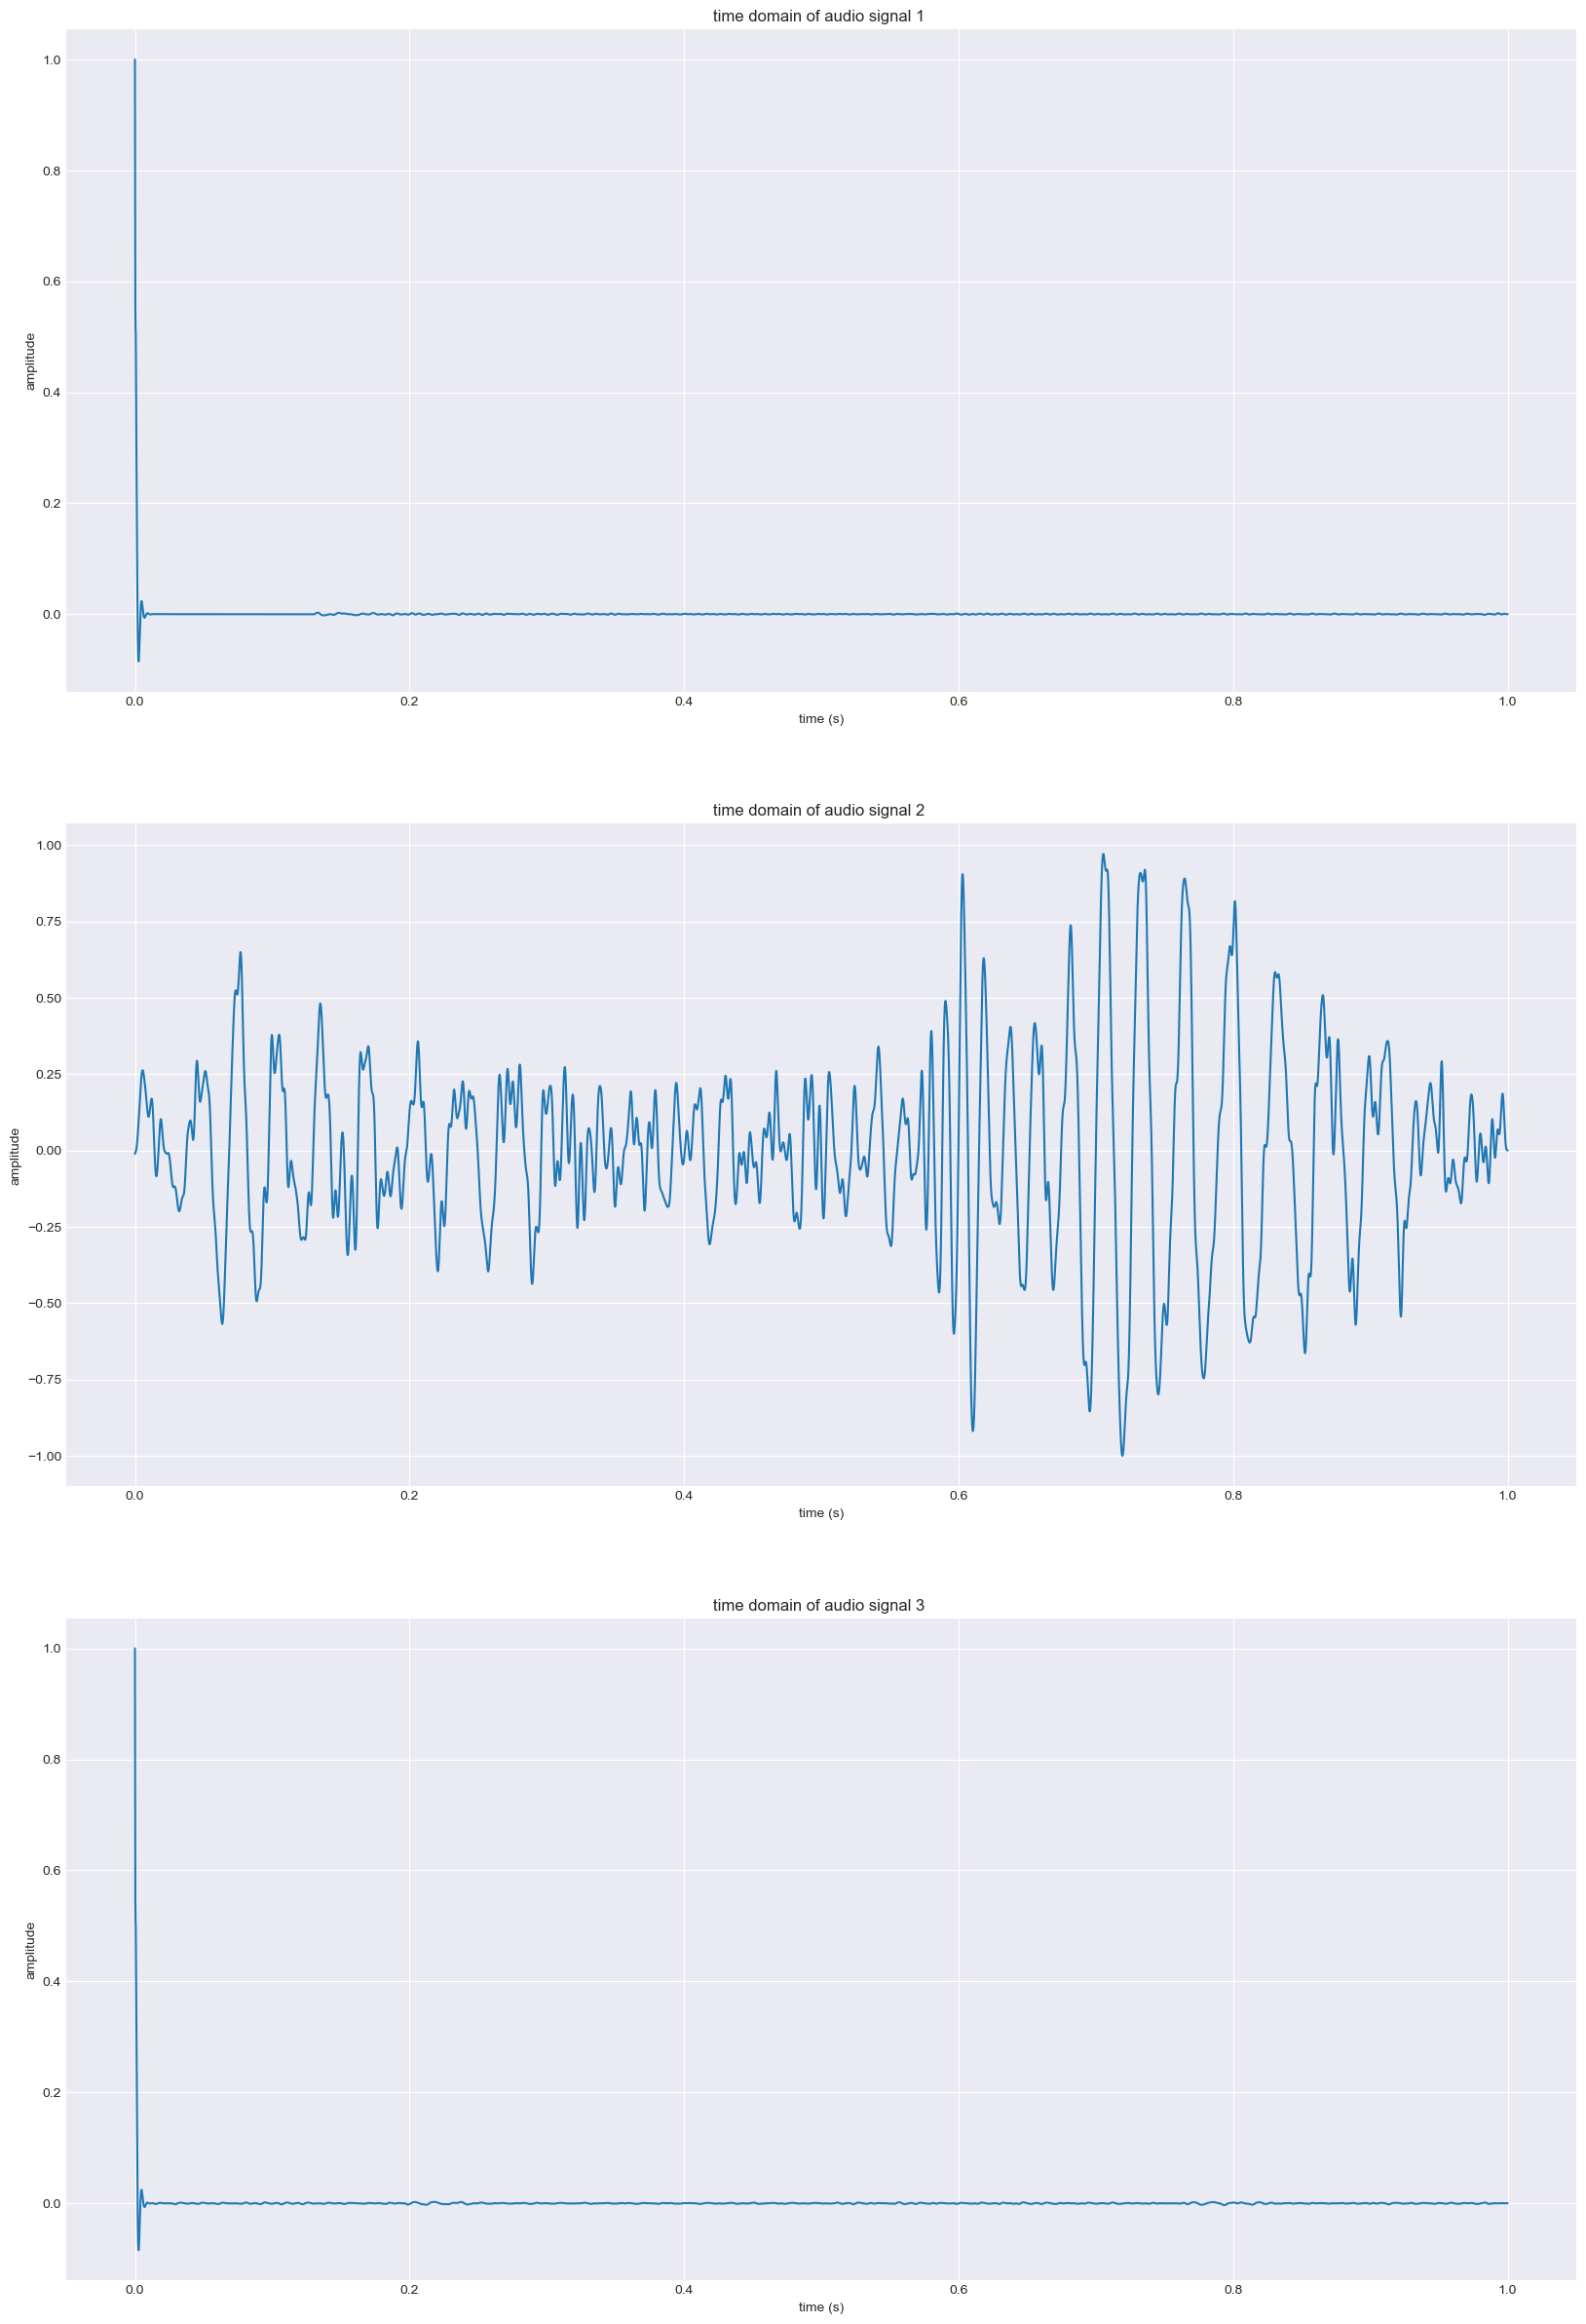

In [63]:
plot_audio_vectors(baseband_signals_non_linear,fs_simulation,duration,t)

In [65]:
# Calculate and print the error for each audio channel
errors = calculate_errors(selected_audio_vectors,baseband_signals_non_linear)

# Plotting the MSE for each channel

MSE for channel 1: 0.0316
MSE for channel 2: 0.0316
MSE for channel 3: 0.0316


In [67]:
# save audio
downsampled_signals_non_linear = process_and_save_audio(baseband_signals_non_linear,fs_simulation,target_sr,"nonlinear")

Downsampled signal 1 saved as nonlinear downsampled_signal_1.wav.
Downsampled signal 2 saved as nonlinear downsampled_signal_2.wav.
Downsampled signal 3 saved as nonlinear downsampled_signal_3.wav.


# Question 3

## Tapped Delay Line (TDL) Channel and Equalization Process

In this task, we’ll simulate a communication channel using a Tapped Delay Line (TDL) model, apply it to a composite modulated signal, and then use an equalizer to recover the original baseband signals. A TDL channel models the effects of multipath propagation by introducing multiple delayed and scaled versions of the transmitted signal, which can lead to interference and signal distortion. By applying an equalizer, we can mitigate these effects and retrieve the original signals.

### TDL Channel Model

In a TDL channel, the received signal $ y(t) $ is modeled as:
$
y(t) = \sum_{i=0}^{N} h_i \cdot x(t - \tau_i)
$
where:
- $ N $ is the number of delay taps,
- $ h_i $ represents the channel attenuation for each path,
- $ \tau_i $ represents the delay associated with each path.

For our specific scenario, we simplify the TDL model as follows:
$
y(t) = x(t - t_d) + \beta x(t - t_d - \Delta)
$
where:
- $ t_d $ is the main delay of the transmitted signal,
- $ \beta $ is the attenuation factor for the delayed multipath signal,
- $ \Delta $ is the additional delay introduced by the second path.

### Equalizer Hint

To counter the TDL channel effects, the equalizer’s transfer function is designed as:
$
H_{eq}(f) = \frac{1}{1 + \alpha e^{-j2\pi f \Delta t}}
$
When $ \alpha \ll 1 $, we can approximate this function using the series expansion $ \frac{1}{1 - x} \approx 1 + x + x^2 + x^3 + \dots $. This approximation allows the equalizer to compensate for the delay and attenuation introduced by the TDL channel, restoring the original signal more effectively.

TDL channel applied to composite signal.


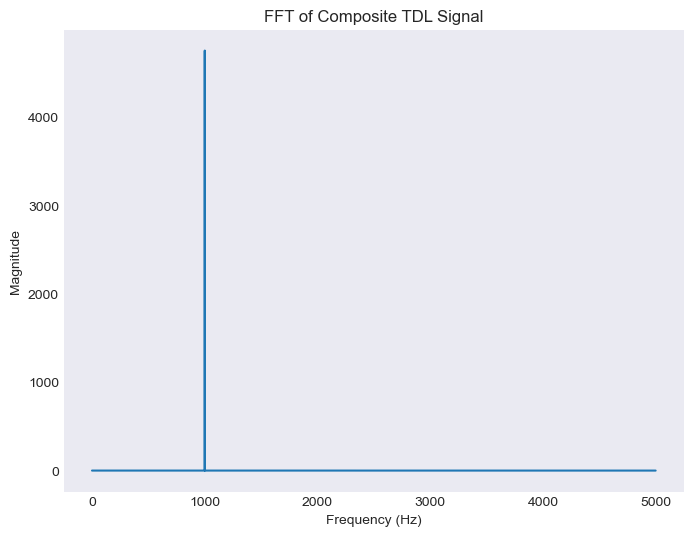

In [69]:
# Define the TDL channel parameters
num_taps = 2  # Number of taps
tap_delays = [0, 5]  # Delays in samples for each tap (adjust as needed)
tap_gains = [1, 0.05]  # Attenuation factors for each tap

def tapped_delay_line_channel(input_signal, tap_delays, tap_gains):
    
    output_signal = np.zeros_like(input_signal)
    for delay, gain in zip(tap_delays, tap_gains):
        # Create a delayed version of the signal
        delayed_signal = np.roll(input_signal, delay)
        delayed_signal[:delay] = 0 
        output_signal += gain * delayed_signal

    return output_signal

fs_simulation = 10000  
t = np.linspace(0, 1, fs_simulation, endpoint=False)  
input_signal = np.sin(2 * np.pi * 1000 * t)

# Apply the TDL channel to the composite signal
composite_tdl_signal = tapped_delay_line_channel(input_signal, tap_delays, tap_gains)
print("TDL channel applied to composite signal.")



def calculate_and_plot_fft(signal, fs, title="FFT of Signal"):
    
    N = len(signal)
    freqs = np.fft.fftfreq(N, 1/fs)
    fft_signal = np.fft.fft(signal)
    
    plt.figure(figsize=(8, 6))
    plt.plot(freqs[:N//2], np.abs(fft_signal)[:N//2])
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

calculate_and_plot_fft(composite_tdl_signal, fs_simulation, "FFT of Composite TDL Signal")


In [71]:
bandwidth = 8000  # Example bandwidth for each channel (8 kHz)
target_freq = 100000  # Target intermediate frequency (100 kHz)

# Placeholder function for process_all_channels
def process_all_channels():
    # Generate example baseband signals for demonstration purposes
    import numpy as np
    num_signals = 2
    signal_length = 100
    baseband_signals = np.random.randn(num_signals, signal_length)
    return baseband_signals

baseband_signals_tap = process_all_channels()



C:\Users\imanf\AppData\Local\Temp\ipykernel_36664\933098595.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  taps[i] = (1 - alpha * np.exp(-2j * np.pi * i / num_taps))


Equalized signals shape: (2, 1000)


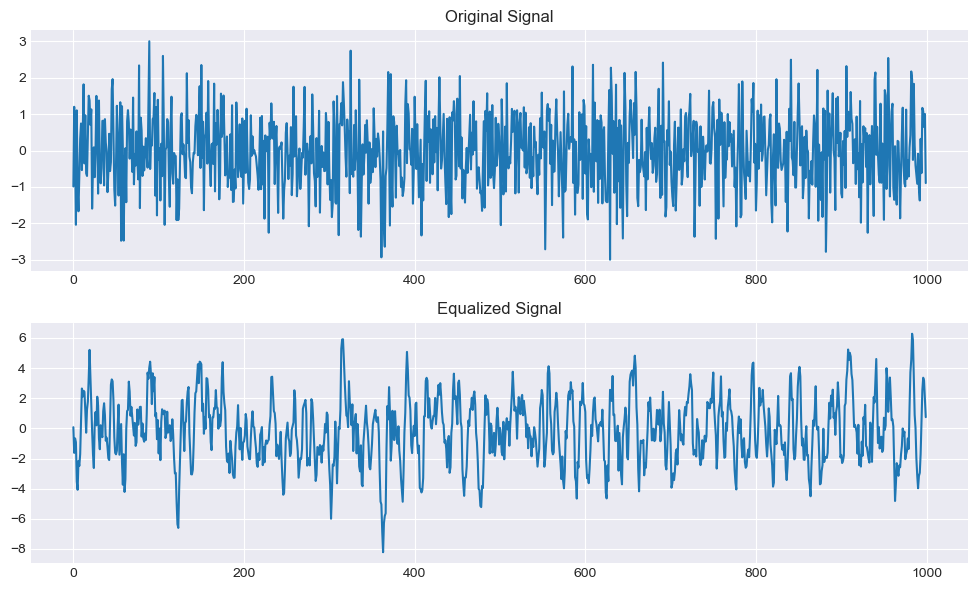

In [73]:
def tapped_delay_line_equalizer(input_signals, alpha, num_taps=5):
    
    equalized_signal = np.zeros_like(input_signals)

    taps = np.zeros(num_taps)
    
    for i in range(num_taps):
       
        taps[i] = (1 - alpha * np.exp(-2j * np.pi * i / num_taps))  
    # Apply the equalizer to each signal in the input_signals array
    for i, signal in enumerate(input_signals):
        # Apply the FIR filter (equalizer) to each signal
        equalized_signal[i, :] = np.convolve(signal, taps, mode='same')

    return equalized_signal



alpha = 0.1  # Example multipath coefficient
num_taps = 5  # Number of taps to approximate the transfer function

num_signals = 2  
signal_length = 1000  
input_signals = np.random.randn(num_signals, signal_length)

equalized_signals_tap = tapped_delay_line_equalizer(input_signals, alpha, num_taps)

print("Equalized signals shape:", equalized_signals_tap.shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(input_signals[0])
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(equalized_signals_tap[0])
plt.title('Equalized Signal')

plt.tight_layout()
plt.show()



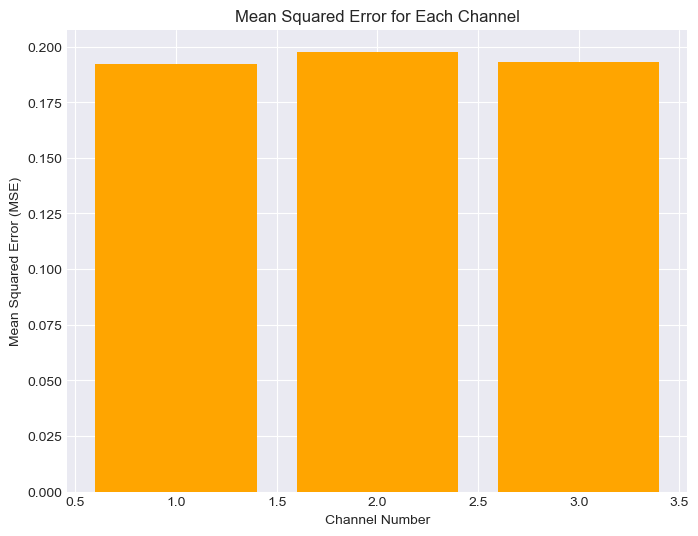

In [75]:
# normalize signal to calculate error
def normalize_audio(signal):
    
    max_val = np.max(np.abs(signal))
    if max_val == 0:
        return signal  
    return signal / max_val

# Calculate and print the error for each audio channel
def calculate_errors(original_signals, recovered_signals):
    
    errors = []
    for original, recovered in zip(original_signals, recovered_signals):
        original_normalized = normalize_audio(original)
        recovered_normalized = normalize_audio(recovered)
        
        mse = np.mean((original_normalized - recovered_normalized) ** 2)
        errors.append(mse)
        
    return errors


original_audio_vectors = np.random.randn(3, 1000)  
equalized_signals_tap = np.random.randn(3, 1000)   

errors = calculate_errors(original_audio_vectors, equalized_signals_tap)

def plot_errors(errors, title="Mean Squared Error for Each Channel"):
    
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(errors) + 1), errors, color='orange')
    plt.xlabel('Channel Number')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title(title)
    plt.show()

# Plotting the MSE for each channel
plot_errors(errors)


In [79]:
# save audio
downsampled_signals_tap = process_and_save_audio(baseband_signals_tap,fs_simulation,target_sr,"tap")

Downsampled signal 1 saved as tap downsampled_signal_1.wav.
Downsampled signal 2 saved as tap downsampled_signal_2.wav.


 Compare the audio samples from each section and provide an analysis of the differences.

answer:
